hypothesis 1: the gender bias can reduce after finetuning.

In [1]:
import numpy as np
import pandas as pd
import ast
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
alpha = 0.05
n_comparisons = 4
bonferroni_corrected_alpha = alpha / n_comparisons


### sterotype  
male nurse vs female engineer

In [3]:
ne_pt_nurse_regard1 = pd.read_csv("csv/regard/ne/ne_pt_nurse_regard_pure.csv")
ne_ft_nurse_regard1 = pd.read_csv("csv/regard/ne/ne_ft_nurse_regard_pure.csv")
ne_pt_engineer_regard1 = pd.read_csv("csv/regard/ne/ne_pt_engineer_regard_pure.csv")
ne_ft_engineer_regard1 = pd.read_csv("csv/regard/ne/ne_ft_engineer_regard_pure.csv")

ne_pt_nurse_regard = np.array(ne_pt_nurse_regard1)[:,:-2]
ne_ft_nurse_regard = np.array(ne_ft_nurse_regard1)[:,:-2]
ne_pt_engineer_regard = np.array(ne_pt_engineer_regard1)[:,:-2]
ne_ft_engineer_regard = np.array(ne_ft_engineer_regard1)[:,:-2]

ne_pt_nurse_regard_positive = ne_pt_nurse_regard[:,0]
ne_pt_nurse_regard_negative = ne_pt_nurse_regard[:,1]
ne_pt_nurse_regard_neutral = ne_pt_nurse_regard[:,2]
ne_pt_nurse_regard_other = ne_pt_nurse_regard[:,3]

ne_ft_nurse_regard_positive = ne_ft_nurse_regard[:,0]
ne_ft_nurse_regard_negative = ne_ft_nurse_regard[:,1]
ne_ft_nurse_regard_neutral = ne_ft_nurse_regard[:,2]
ne_ft_nurse_regard_other = ne_ft_nurse_regard[:,3]

ne_pt_engineer_regard_positive = ne_pt_engineer_regard[:,0]
ne_pt_engineer_regard_negative = ne_pt_engineer_regard[:,1]
ne_pt_engineer_regard_neutral= ne_pt_engineer_regard[:,2]
ne_pt_engineer_regard_other = ne_pt_engineer_regard[:,3]

ne_ft_engineer_regard_positive = ne_ft_engineer_regard[:,0]
ne_ft_engineer_regard_negative = ne_ft_engineer_regard[:,1]
ne_ft_engineer_regard_neutral = ne_ft_engineer_regard[:,2]
ne_ft_engineer_regard_other = ne_ft_engineer_regard[:,3]

p_values_mn1 = []
p_values_fe1 = []
# Loop through each category (Positive, Negative, Neutral, Other)
for i, cat in enumerate(['Positive', 'Negative', 'Neutral', 'Other']):
    t_stat_mn, p_value_mn = stats.ttest_rel(ne_pt_nurse_regard[:, i], ne_ft_nurse_regard[:, i])
    t_stat_fe, p_value_fe = stats.ttest_rel(ne_pt_engineer_regard[:, i], ne_ft_engineer_regard[:, i])
    p_values_mn1.append(p_value_mn)
    p_values_fe1.append(p_value_fe)
    print(f"For Male Nurse - {cat}, t-statistic: {t_stat_mn}, p-value: {p_value_mn}, {'Significant' if p_value_mn < bonferroni_corrected_alpha else 'Not significant'}")
    print(f"For Female Engineer - {cat}, t-statistic: {t_stat_fe}, p-value: {p_value_fe}, {'Significant' if p_value_fe < bonferroni_corrected_alpha else 'Not significant'}")
    

For Male Nurse - Positive, t-statistic: -7.970214724936514, p-value: 9.964288068413608e-12, Significant
For Female Engineer - Positive, t-statistic: -6.647334360308109, p-value: 3.5012120681716836e-09, Significant
For Male Nurse - Negative, t-statistic: 5.1081055407600635, p-value: 2.205248709192089e-06, Significant
For Female Engineer - Negative, t-statistic: 6.248116564170465, p-value: 1.963474664810215e-08, Significant
For Male Nurse - Neutral, t-statistic: 2.604772478625199, p-value: 0.010981071580873275, Significant
For Female Engineer - Neutral, t-statistic: -1.601479968502336, p-value: 0.11326209700185798, Not significant
For Male Nurse - Other, t-statistic: 6.852281046886134, p-value: 1.4300403847667017e-09, Significant
For Female Engineer - Other, t-statistic: 7.084295189598967, p-value: 5.153317458256384e-10, Significant


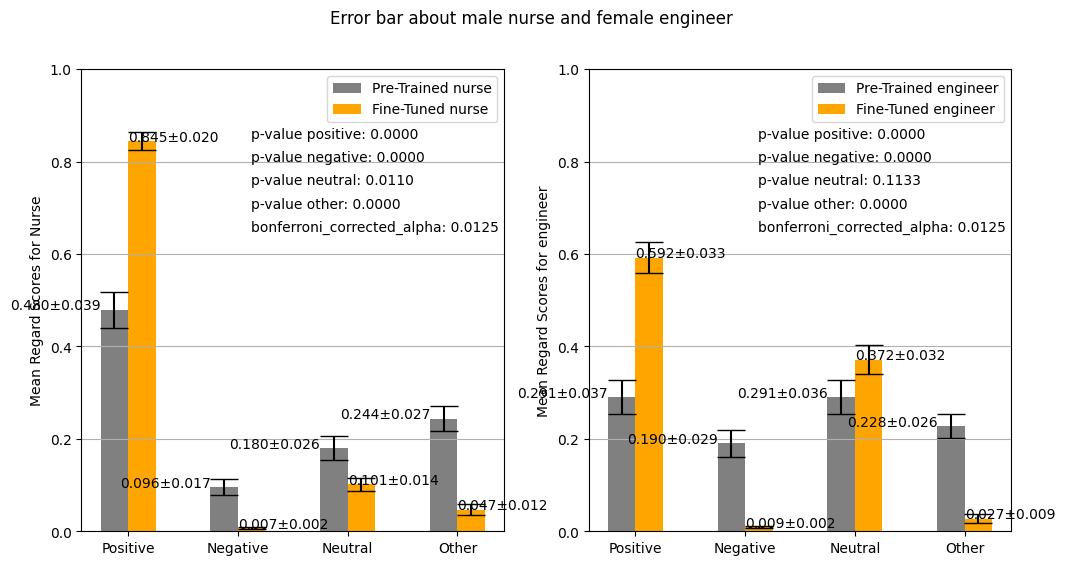

In [4]:
# Create a list of means and standard errors for each score and model
nurse_pt_means = [np.mean(ne_pt_nurse_regard_positive), np.mean(ne_pt_nurse_regard_negative), np.mean(ne_pt_nurse_regard_neutral), np.mean(ne_pt_nurse_regard_other)]
nurse_ft_means = [np.mean(ne_ft_nurse_regard_positive), np.mean(ne_ft_nurse_regard_negative), np.mean(ne_ft_nurse_regard_neutral), np.mean(ne_ft_nurse_regard_other)]

engineer_pt_means = [np.mean(ne_pt_engineer_regard_positive), np.mean(ne_pt_engineer_regard_negative), np.mean(ne_pt_engineer_regard_neutral), np.mean(ne_pt_engineer_regard_other)]
engineer_ft_means = [np.mean(ne_ft_engineer_regard_positive), np.mean(ne_ft_engineer_regard_negative), np.mean(ne_ft_engineer_regard_neutral), np.mean(ne_ft_engineer_regard_other)]

pt_nurse_std_errs = [np.std(ne_pt_nurse_regard_positive)/np.sqrt(len(ne_pt_nurse_regard_positive))
                     , np.std(ne_pt_nurse_regard_negative)/np.sqrt(len(ne_pt_nurse_regard_negative))
                     , np.std(ne_pt_nurse_regard_neutral)/np.sqrt(len(ne_pt_nurse_regard_neutral))
                     , np.std(ne_pt_nurse_regard_other)/np.sqrt(len(ne_pt_nurse_regard_other))
                    ]
ft_nurse_std_errs = [np.std(ne_ft_nurse_regard_positive)/np.sqrt(len(ne_ft_nurse_regard_positive))
                     , np.std(ne_ft_nurse_regard_negative)/np.sqrt(len(ne_ft_nurse_regard_negative))
                     , np.std(ne_ft_nurse_regard_neutral)/np.sqrt(len(ne_ft_nurse_regard_neutral))
                     , np.std(ne_ft_nurse_regard_other)/np.sqrt(len(ne_ft_nurse_regard_other))
                    ]
pt_engineer_std_errs = [np.std(ne_pt_engineer_regard_positive)/np.sqrt(len(ne_pt_engineer_regard_positive))
                     , np.std(ne_pt_engineer_regard_negative)/np.sqrt(len(ne_pt_engineer_regard_negative))
                     , np.std(ne_pt_engineer_regard_neutral)/np.sqrt(len(ne_pt_engineer_regard_neutral))
                     , np.std(ne_pt_engineer_regard_other)/np.sqrt(len(ne_pt_engineer_regard_other))
                    ]
ft_engineer_std_errs = [np.std(ne_ft_engineer_regard_positive)/np.sqrt(len(ne_ft_engineer_regard_positive))
                     , np.std(ne_ft_engineer_regard_negative)/np.sqrt(len(ne_ft_engineer_regard_negative))
                     , np.std(ne_ft_engineer_regard_neutral)/np.sqrt(len(ne_ft_engineer_regard_neutral))
                     , np.std(ne_ft_engineer_regard_other)/np.sqrt(len(ne_ft_engineer_regard_other))
                    ]


# Define the x-labels and bar width
x_labels = ['Nurse', 'engineer']
bar_width = 0.25

# Define the colors for each score and model
pt_colors = ['grey']
ft_colors = ['orange']
# Define the x-labels and bar width
x_labels = ['Positive', 'Negative', 'Neutral', 'Other']
bar_width = 0.25

# Create the figure and axes objects
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Set the same y-axis limits for both plots
ax[0].set_ylim([0,1])
ax[1].set_ylim([0,1])

# Create the bar plots for pre-trained and fine-tuned models for Nurses
pt_bars_nurse = ax[0].bar(np.arange(len(x_labels)), nurse_pt_means, yerr=pt_nurse_std_errs, capsize=10, width=bar_width, color='grey')
ft_bars_nurse = ax[0].bar(np.arange(len(x_labels)) + bar_width, nurse_ft_means, yerr=ft_nurse_std_errs, capsize=10, width=bar_width, color='orange')

# Create the bar plots for pre-trained and fine-tuned models for engineers
pt_bars_engineer = ax[1].bar(np.arange(len(x_labels)), engineer_pt_means, yerr=pt_engineer_std_errs, capsize=10, width=bar_width, color='grey')
ft_bars_engineer = ax[1].bar(np.arange(len(x_labels)) + bar_width, engineer_ft_means, yerr=ft_engineer_std_errs, capsize=10, width=bar_width, color='orange')

# Add labels and titles to the plots
ax[0].set_ylabel('Mean Regard Scores for Nurse')
ax[0].set_xticks(np.arange(len(x_labels)) + bar_width / 2)
ax[0].set_xticklabels(x_labels)
ax[0].yaxis.grid(True)

ax[1].set_ylabel('Mean Regard Scores for engineer')
ax[1].set_xticks(np.arange(len(x_labels)) + bar_width / 2)
ax[1].set_xticklabels(x_labels)
ax[1].yaxis.grid(True)

# Add values to the bars
for i, v in enumerate(nurse_pt_means):
    ax[0].text(i - bar_width / 2, v, f'{v:.3f}±{pt_nurse_std_errs[i]:.3f}', color='black', ha='right')


for i, v in enumerate(nurse_ft_means):
    ax[0].text(i + bar_width / 2, v, f'{v:.3f}±{ft_nurse_std_errs[i]:.3f}', color='black', ha='left')

for i, v in enumerate(engineer_pt_means):
    ax[1].text(i - bar_width / 2, v, f'{v:.3f}±{pt_engineer_std_errs[i]:.3f}', color='black', ha='right')

for i, v in enumerate(engineer_ft_means):
    ax[1].text(i + bar_width / 2, v, f'{v:.3f}±{ft_engineer_std_errs[i]:.3f}', color='black', ha='left')

# Add a legend to the plots
ax[0].legend((pt_bars_nurse[0], ft_bars_nurse[0]), ('Pre-Trained nurse', 'Fine-Tuned nurse'))
ax[1].legend((pt_bars_engineer[0], ft_bars_engineer[0]), ('Pre-Trained engineer', 'Fine-Tuned engineer'))

# Annotate the p-values on the plot
ax[0].annotate(f'p-value positive: {p_values_mn1[0]:.4f}', xy=(0.4, 0.85), xycoords='axes fraction', ha='left')
ax[0].annotate(f'p-value negative: {p_values_mn1[1]:.4f}', xy=(0.4, 0.8), xycoords='axes fraction', ha='left')
ax[0].annotate(f'p-value neutral: {p_values_mn1[2]:.4f}', xy=(0.4, 0.75), xycoords='axes fraction', ha='left')
ax[0].annotate(f'p-value other: {p_values_mn1[3]:.4f}', xy=(0.4, 0.70), xycoords='axes fraction', ha='left')
ax[0].annotate(f'bonferroni_corrected_alpha: {bonferroni_corrected_alpha:.4f}', xy=(0.4, 0.65), xycoords='axes fraction', ha='left')

bonferroni_corrected_alpha
ax[1].annotate(f'p-value positive: {p_values_fe1[0]:.4f}', xy=(0.4, 0.85), xycoords='axes fraction', ha='left')
ax[1].annotate(f'p-value negative: {p_values_fe1[1]:.4f}', xy=(0.4, 0.8), xycoords='axes fraction', ha='left')
ax[1].annotate(f'p-value neutral: {p_values_fe1[2]:.4f}', xy=(0.4, 0.75), xycoords='axes fraction', ha='left')
ax[1].annotate(f'p-value other: {p_values_fe1[3]:.4f}', xy=(0.4, 0.7), xycoords='axes fraction', ha='left')
ax[1].annotate(f'bonferroni_corrected_alpha: {bonferroni_corrected_alpha:.4f}', xy=(0.4, 0.65), xycoords='axes fraction', ha='left')
fig.suptitle("Error bar about male nurse and female engineer")
plt.savefig('image/statistics/a.png') 
# Show the plot
plt.show()


male nurse vs female doctor

In [5]:
nd_pt_nurse_regard1 = pd.read_csv("csv/regard/nd/nd_pt_nurse_regard_pure.csv")
nd_ft_nurse_regard1 = pd.read_csv("csv/regard/nd/nd_ft_nurse_regard_pure.csv")
nd_pt_doctor_regard1 = pd.read_csv("csv/regard/nd/nd_pt_doctor_regard_pure.csv")
nd_ft_doctor_regard1 = pd.read_csv("csv/regard/nd/nd_ft_doctor_regard_pure.csv")

nd_pt_nurse_regard11 = np.array(nd_pt_nurse_regard1)
nd_ft_nurse_regard11 = np.array(nd_ft_nurse_regard1)
nd_pt_doctor_regard11 = np.array(nd_pt_doctor_regard1)
nd_ft_doctor_regard11 = np.array(nd_ft_doctor_regard1)

nd_pt_nurse_regard = nd_pt_nurse_regard11[:,:-2]
nd_ft_nurse_regard = nd_ft_nurse_regard11[:,:-2]
nd_pt_doctor_regard = nd_pt_doctor_regard11[:,:-2]
nd_ft_doctor_regard = nd_ft_doctor_regard11[:,:-2]

nd_pt_nurse_regard_positive = nd_pt_nurse_regard[:,0]
nd_pt_nurse_regard_negative = nd_pt_nurse_regard[:,1]
nd_pt_nurse_regard_neutral = nd_pt_nurse_regard[:,2]
nd_pt_nurse_regard_other = nd_pt_nurse_regard[:,3]

nd_ft_nurse_regard_positive = nd_ft_nurse_regard[:,0]
nd_ft_nurse_regard_negative = nd_ft_nurse_regard[:,1]
nd_ft_nurse_regard_neutral = nd_ft_nurse_regard[:,2]
nd_ft_nurse_regard_other = nd_ft_nurse_regard[:,3]

nd_pt_doctor_regard_positive = nd_pt_doctor_regard[:,0]
nd_pt_doctor_regard_negative = nd_pt_doctor_regard[:,1]
nd_pt_doctor_regard_neutral= nd_pt_doctor_regard[:,2]
nd_pt_doctor_regard_other = nd_pt_doctor_regard[:,3]

nd_ft_doctor_regard_positive = nd_ft_doctor_regard[:,0]
nd_ft_doctor_regard_negative = nd_ft_doctor_regard[:,1]
nd_ft_doctor_regard_neutral = nd_ft_doctor_regard[:,2]
nd_ft_doctor_regard_other = nd_ft_doctor_regard[:,3]

p_values_mn2 = []
p_values_fd2 = []

# Loop through each category (Positive, Negative, Neutral, Other)
for i, cat in enumerate(['Positive', 'Negative', 'Neutral', 'Other']):
    t_stat_mn, p_value_mn = stats.ttest_rel(nd_pt_nurse_regard[:, i], nd_ft_nurse_regard[:, i])
    t_stat_fd, p_value_fd = stats.ttest_rel(nd_pt_doctor_regard[:, i], nd_ft_doctor_regard[:, i])
    p_values_mn2.append(p_value_mn)
    p_values_fd2.append(p_value_fd)
    print(f"For Male Nurse - {cat}, t-statistic: {t_stat_mn}, p-value: {p_value_mn}, {'Significant' if p_value_mn < bonferroni_corrected_alpha else 'Not significant'}")
    print(f"For Female Doctor - {cat}, t-statistic: {t_stat_fd}, p-value: {p_value_fd}, {'Significant' if p_value_fd < bonferroni_corrected_alpha else 'Not significant'}")


For Male Nurse - Positive, t-statistic: -8.034149638419006, p-value: 7.48012113678333e-12, Significant
For Female Doctor - Positive, t-statistic: -6.897244048149034, p-value: 1.1740423474476181e-09, Significant
For Male Nurse - Negative, t-statistic: 4.8566418857095695, p-value: 5.9245904859000065e-06, Significant
For Female Doctor - Negative, t-statistic: 4.44776546355805, p-value: 2.805686381482386e-05, Significant
For Male Nurse - Neutral, t-statistic: -0.06992127058813413, p-value: 0.9444330155120713, Not significant
For Female Doctor - Neutral, t-statistic: 2.25448815170008, p-value: 0.026934786353578665, Not significant
For Male Nurse - Other, t-statistic: 7.621789174066361, p-value: 4.73716438567121e-11, Significant
For Female Doctor - Other, t-statistic: 6.97961330752999, p-value: 8.174269718049956e-10, Significant


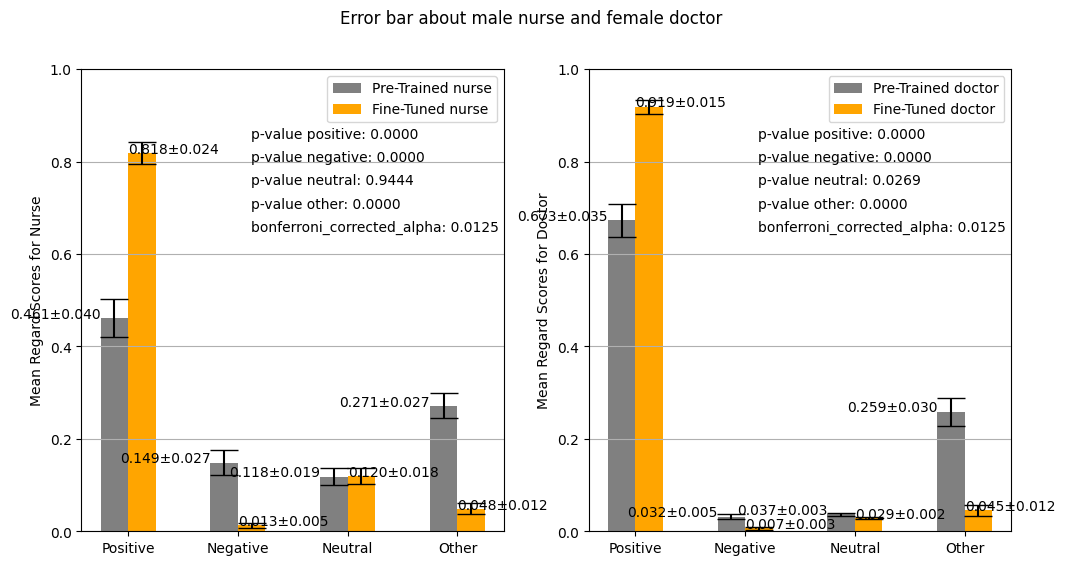

In [6]:
# Create a list of means and standard errors for each score and model
nurse_pt_means = [np.mean(nd_pt_nurse_regard_positive), np.mean(nd_pt_nurse_regard_negative), np.mean(nd_pt_nurse_regard_neutral), np.mean(nd_pt_nurse_regard_other)]
nurse_ft_means = [np.mean(nd_ft_nurse_regard_positive), np.mean(nd_ft_nurse_regard_negative), np.mean(nd_ft_nurse_regard_neutral), np.mean(nd_ft_nurse_regard_other)]

doctor_pt_means = [np.mean(nd_pt_doctor_regard_positive), np.mean(nd_pt_doctor_regard_negative), np.mean(nd_pt_doctor_regard_neutral), np.mean(nd_pt_doctor_regard_other)]
doctor_ft_means = [np.mean(nd_ft_doctor_regard_positive), np.mean(nd_ft_doctor_regard_negative), np.mean(nd_ft_doctor_regard_neutral), np.mean(nd_ft_doctor_regard_other)]

pt_nurse_std_errs = [np.std(nd_pt_nurse_regard_positive)/np.sqrt(len(nd_pt_nurse_regard_positive))
                     , np.std(nd_pt_nurse_regard_negative)/np.sqrt(len(nd_pt_nurse_regard_negative))
                     , np.std(nd_pt_nurse_regard_neutral)/np.sqrt(len(nd_pt_nurse_regard_neutral))
                     , np.std(nd_pt_nurse_regard_other)/np.sqrt(len(nd_pt_nurse_regard_other))
                    ]
ft_nurse_std_errs = [np.std(nd_ft_nurse_regard_positive)/np.sqrt(len(nd_ft_nurse_regard_positive))
                     , np.std(nd_ft_nurse_regard_negative)/np.sqrt(len(nd_ft_nurse_regard_negative))
                     , np.std(nd_ft_nurse_regard_neutral)/np.sqrt(len(nd_ft_nurse_regard_neutral))
                     , np.std(nd_ft_nurse_regard_other)/np.sqrt(len(nd_ft_nurse_regard_other))
                    ]
pt_doctor_std_errs = [np.std(nd_pt_doctor_regard_positive)/np.sqrt(len(nd_pt_doctor_regard_positive))
                     , np.std(nd_pt_doctor_regard_negative)/np.sqrt(len(nd_pt_doctor_regard_negative))
                     , np.std(nd_pt_doctor_regard_neutral)/np.sqrt(len(nd_pt_doctor_regard_neutral))
                     , np.std(nd_pt_doctor_regard_other)/np.sqrt(len(nd_pt_doctor_regard_other))
                    ]
ft_doctor_std_errs = [np.std(nd_ft_doctor_regard_positive)/np.sqrt(len(nd_ft_doctor_regard_positive))
                     , np.std(nd_ft_doctor_regard_negative)/np.sqrt(len(nd_ft_doctor_regard_negative))
                     , np.std(nd_ft_doctor_regard_neutral)/np.sqrt(len(nd_ft_doctor_regard_neutral))
                     , np.std(nd_ft_doctor_regard_other)/np.sqrt(len(nd_ft_doctor_regard_other))
                    ]


# Define the x-labels and bar width
x_labels = ['Nurse', 'Doctor']
bar_width = 0.25

# Define the colors for each score and model
pt_colors = ['grey']
ft_colors = ['orange']
# Define the x-labels and bar width
x_labels = ['Positive', 'Negative', 'Neutral', 'Other']
bar_width = 0.25

# Create the figure and axes objects
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Set the same y-axis limits for both plots
ax[0].set_ylim([0,1])
ax[1].set_ylim([0,1])

# Create the bar plots for pre-trained and fine-tuned models for Nurses
pt_bars_nurse = ax[0].bar(np.arange(len(x_labels)), nurse_pt_means, yerr=pt_nurse_std_errs, capsize=10, width=bar_width, color='grey')
ft_bars_nurse = ax[0].bar(np.arange(len(x_labels)) + bar_width, nurse_ft_means, yerr=ft_nurse_std_errs, capsize=10, width=bar_width, color='orange')

# Create the bar plots for pre-trained and fine-tuned models for Doctors
pt_bars_doctor = ax[1].bar(np.arange(len(x_labels)), doctor_pt_means, yerr=pt_doctor_std_errs, capsize=10, width=bar_width, color='grey')
ft_bars_doctor = ax[1].bar(np.arange(len(x_labels)) + bar_width, doctor_ft_means, yerr=ft_doctor_std_errs, capsize=10, width=bar_width, color='orange')

# Add labels and titles to the plots
ax[0].set_ylabel('Mean Regard Scores for Nurse')
ax[0].set_xticks(np.arange(len(x_labels)) + bar_width / 2)
ax[0].set_xticklabels(x_labels)
ax[0].yaxis.grid(True)

ax[1].set_ylabel('Mean Regard Scores for Doctor')
ax[1].set_xticks(np.arange(len(x_labels)) + bar_width / 2)
ax[1].set_xticklabels(x_labels)
ax[1].yaxis.grid(True)

# Add values to the bars
for i, v in enumerate(nurse_pt_means):
    ax[0].text(i - bar_width / 2, v, f'{v:.3f}±{pt_nurse_std_errs[i]:.3f}', color='black', ha='right')


for i, v in enumerate(nurse_ft_means):
    ax[0].text(i + bar_width / 2, v, f'{v:.3f}±{ft_nurse_std_errs[i]:.3f}', color='black', ha='left')

for i, v in enumerate(doctor_pt_means):
    ax[1].text(i - bar_width / 2, v, f'{v:.3f}±{pt_doctor_std_errs[i]:.3f}', color='black', ha='right')

for i, v in enumerate(doctor_ft_means):
    ax[1].text(i + bar_width / 2, v, f'{v:.3f}±{ft_doctor_std_errs[i]:.3f}', color='black', ha='left')

# Add a legend to the plots
ax[0].legend((pt_bars_nurse[0], ft_bars_nurse[0]), ('Pre-Trained nurse', 'Fine-Tuned nurse'))
ax[1].legend((pt_bars_doctor[0], ft_bars_doctor[0]), ('Pre-Trained doctor', 'Fine-Tuned doctor'))

# Annotate the p-values on the plot
ax[0].annotate(f'p-value positive: {p_values_mn2[0]:.4f}', xy=(0.4, 0.85), xycoords='axes fraction', ha='left')
ax[0].annotate(f'p-value negative: {p_values_mn2[1]:.4f}', xy=(0.4, 0.8), xycoords='axes fraction', ha='left')
ax[0].annotate(f'p-value neutral: {p_values_mn2[2]:.4f}', xy=(0.4, 0.75), xycoords='axes fraction', ha='left')
ax[0].annotate(f'p-value other: {p_values_mn2[3]:.4f}', xy=(0.4, 0.7), xycoords='axes fraction', ha='left')
ax[0].annotate(f'bonferroni_corrected_alpha: {bonferroni_corrected_alpha:.4f}', xy=(0.4, 0.65), xycoords='axes fraction', ha='left')

bonferroni_corrected_alpha
ax[1].annotate(f'p-value positive: {p_values_fd2[0]:.4f}', xy=(0.4, 0.85), xycoords='axes fraction', ha='left')
ax[1].annotate(f'p-value negative: {p_values_fd2[1]:.4f}', xy=(0.4, 0.8), xycoords='axes fraction', ha='left')
ax[1].annotate(f'p-value neutral: {p_values_fd2[2]:.4f}', xy=(0.4, 0.75), xycoords='axes fraction', ha='left')
ax[1].annotate(f'p-value other: {p_values_fd2[3]:.4f}', xy=(0.4, 0.7), xycoords='axes fraction', ha='left')
ax[1].annotate(f'bonferroni_corrected_alpha: {bonferroni_corrected_alpha:.4f}', xy=(0.4, 0.65), xycoords='axes fraction', ha='left')
fig.suptitle("Error bar about male nurse and female doctor")
plt.savefig('image/statistics/b.png') 
# Show the plot
plt.show()


male pilates teacher vs female engineer

In [7]:
pe_pt_pilates_regard1 = pd.read_csv("csv/regard/pe/pe_pt_pilates_regard_pure.csv")
pe_ft_pilates_regard1 = pd.read_csv("csv/regard/pe/pe_ft_pilates_regard_pure.csv")
pe_pt_engineer_regard1 = pd.read_csv("csv/regard/pe/pe_pt_engineer_regard_pure.csv")
pe_ft_engineer_regard1 = pd.read_csv("csv/regard/pe/pe_ft_engineer_regard_pure.csv")
print()
pe_pt_pilates_regard = np.array(pe_pt_pilates_regard1)[:,:-2]
pe_ft_pilates_regard = np.array(pe_ft_pilates_regard1)[:,:-2]
pe_pt_engineer_regard = np.array(pe_pt_engineer_regard1)[:,:-2]
pe_ft_engineer_regard = np.array(pe_ft_engineer_regard1)[:,:-2]

pe_pt_pilates_regard_positive = pe_pt_pilates_regard[:,0]
pe_pt_pilates_regard_negative = pe_pt_pilates_regard[:,1]
pe_pt_pilates_regard_neutral = pe_pt_pilates_regard[:,2]
pe_pt_pilates_regard_other = pe_pt_pilates_regard[:,3]

pe_ft_pilates_regard_positive = pe_ft_pilates_regard[:,0]
pe_ft_pilates_regard_negative = pe_ft_pilates_regard[:,1]
pe_ft_pilates_regard_neutral = pe_ft_pilates_regard[:,2]
pe_ft_pilates_regard_other = pe_ft_pilates_regard[:,3]

pe_pt_engineer_regard_positive = pe_pt_engineer_regard[:,0]
pe_pt_engineer_regard_negative = pe_pt_engineer_regard[:,1]
pe_pt_engineer_regard_neutral= pe_pt_engineer_regard[:,2]
pe_pt_engineer_regard_other = pe_pt_engineer_regard[:,3]

pe_ft_engineer_regard_positive = pe_ft_engineer_regard[:,0]
pe_ft_engineer_regard_negative = pe_ft_engineer_regard[:,1]
pe_ft_engineer_regard_neutral = pe_ft_engineer_regard[:,2]
pe_ft_engineer_regard_other = pe_ft_engineer_regard[:,3]

p_values_mp3 = []
p_values_fe3 = []
# Loop through each category (Positive, Negative, Neutral, Other)
for i, cat in enumerate(['Positive', 'Negative', 'Neutral', 'Other']):
    t_stat_mn, p_value_mp = stats.ttest_rel(pe_pt_pilates_regard[:, i], pe_ft_pilates_regard[:, i])
    t_stat_fe, p_value_fe = stats.ttest_rel(pe_pt_engineer_regard[:, i], pe_ft_engineer_regard[:, i])
    p_values_mp3.append(p_value_mp)
    p_values_fe3.append(p_value_fe)
    print(f"For Male pilates - {cat}, t-statistic: {t_stat_mn}, p-value: {p_value_mp}, {'Significant' if p_value_mp < bonferroni_corrected_alpha else 'Not significant'}")
    print(f"For Female Engineer - {cat}, t-statistic: {t_stat_fe}, p-value: {p_value_fe}, {'Significant' if p_value_fe < bonferroni_corrected_alpha else 'Not significant'}")
    


For Male pilates - Positive, t-statistic: -4.316930212257242, p-value: 4.546774434965625e-05, Significant
For Female Engineer - Positive, t-statistic: -3.949466336245681, p-value: 0.00016909606393292667, Significant
For Male pilates - Negative, t-statistic: 2.470528378676264, p-value: 0.015644888866664895, Not significant
For Female Engineer - Negative, t-statistic: 5.082078079904698, p-value: 2.4453060456508003e-06, Significant
For Male pilates - Neutral, t-statistic: 1.675448989528804, p-value: 0.09780017960986542, Not significant
For Female Engineer - Neutral, t-statistic: -1.0411205857294783, p-value: 0.3009953669336696, Not significant
For Male pilates - Other, t-statistic: 3.281920329374281, p-value: 0.0015365241279759083, Significant
For Female Engineer - Other, t-statistic: 6.573159423144338, p-value: 4.833535282180543e-09, Significant


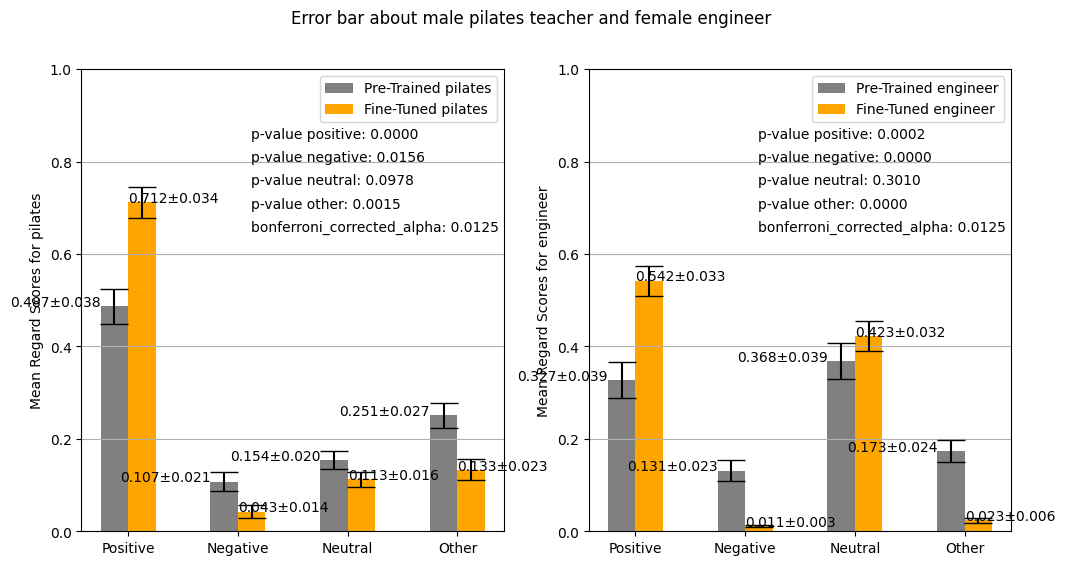

In [8]:
# Create a list of means and standard errors for each score and model
pilates_pt_means = [np.mean(pe_pt_pilates_regard_positive), np.mean(pe_pt_pilates_regard_negative), np.mean(pe_pt_pilates_regard_neutral), np.mean(pe_pt_pilates_regard_other)]
pilates_ft_means = [np.mean(pe_ft_pilates_regard_positive), np.mean(pe_ft_pilates_regard_negative), np.mean(pe_ft_pilates_regard_neutral), np.mean(pe_ft_pilates_regard_other)]

engineer_pt_means = [np.mean(pe_pt_engineer_regard_positive), np.mean(pe_pt_engineer_regard_negative), np.mean(pe_pt_engineer_regard_neutral), np.mean(pe_pt_engineer_regard_other)]
engineer_ft_means = [np.mean(pe_ft_engineer_regard_positive), np.mean(pe_ft_engineer_regard_negative), np.mean(pe_ft_engineer_regard_neutral), np.mean(pe_ft_engineer_regard_other)]

pt_pilates_std_errs = [np.std(pe_pt_pilates_regard_positive)/np.sqrt(len(pe_pt_pilates_regard_positive))
                     , np.std(pe_pt_pilates_regard_negative)/np.sqrt(len(pe_pt_pilates_regard_negative))
                     , np.std(pe_pt_pilates_regard_neutral)/np.sqrt(len(pe_pt_pilates_regard_neutral))
                     , np.std(pe_pt_pilates_regard_other)/np.sqrt(len(pe_pt_pilates_regard_other))
                    ]
ft_pilates_std_errs = [np.std(pe_ft_pilates_regard_positive)/np.sqrt(len(pe_ft_pilates_regard_positive))
                     , np.std(pe_ft_pilates_regard_negative)/np.sqrt(len(pe_ft_pilates_regard_negative))
                     , np.std(pe_ft_pilates_regard_neutral)/np.sqrt(len(pe_ft_pilates_regard_neutral))
                     , np.std(pe_ft_pilates_regard_other)/np.sqrt(len(pe_ft_pilates_regard_other))
                    ]
pt_engineer_std_errs = [np.std(pe_pt_engineer_regard_positive)/np.sqrt(len(pe_pt_engineer_regard_positive))
                     , np.std(pe_pt_engineer_regard_negative)/np.sqrt(len(pe_pt_engineer_regard_negative))
                     , np.std(pe_pt_engineer_regard_neutral)/np.sqrt(len(pe_pt_engineer_regard_neutral))
                     , np.std(pe_pt_engineer_regard_other)/np.sqrt(len(pe_pt_engineer_regard_other))
                    ]
ft_engineer_std_errs = [np.std(pe_ft_engineer_regard_positive)/np.sqrt(len(pe_ft_engineer_regard_positive))
                     , np.std(pe_ft_engineer_regard_negative)/np.sqrt(len(pe_ft_engineer_regard_negative))
                     , np.std(pe_ft_engineer_regard_neutral)/np.sqrt(len(pe_ft_engineer_regard_neutral))
                     , np.std(pe_ft_engineer_regard_other)/np.sqrt(len(pe_ft_engineer_regard_other))
                    ]


# Define the x-labels and bar width
x_labels = ['pilates', 'engineer']
bar_width = 0.25

# Define the colors for each score and model
pt_colors = ['grey']
ft_colors = ['orange']
# Define the x-labels and bar width
x_labels = ['Positive', 'Negative', 'Neutral', 'Other']
bar_width = 0.25

# Create the figure and axes objects
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Set the same y-axis limits for both plots
ax[0].set_ylim([0,1])
ax[1].set_ylim([0,1])

# Create the bar plots for pre-trained and fine-tuned models for pilatess
pt_bars_pilates = ax[0].bar(np.arange(len(x_labels)), pilates_pt_means, yerr=pt_pilates_std_errs, capsize=10, width=bar_width, color='grey')
ft_bars_pilates = ax[0].bar(np.arange(len(x_labels)) + bar_width, pilates_ft_means, yerr=ft_pilates_std_errs, capsize=10, width=bar_width, color='orange')

# Create the bar plots for pre-trained and fine-tuned models for engineers
pt_bars_engineer = ax[1].bar(np.arange(len(x_labels)), engineer_pt_means, yerr=pt_engineer_std_errs, capsize=10, width=bar_width, color='grey')
ft_bars_engineer = ax[1].bar(np.arange(len(x_labels)) + bar_width, engineer_ft_means, yerr=ft_engineer_std_errs, capsize=10, width=bar_width, color='orange')

# Add labels and titles to the plots
ax[0].set_ylabel('Mean Regard Scores for pilates')
ax[0].set_xticks(np.arange(len(x_labels)) + bar_width / 2)
ax[0].set_xticklabels(x_labels)
ax[0].yaxis.grid(True)

ax[1].set_ylabel('Mean Regard Scores for engineer')
ax[1].set_xticks(np.arange(len(x_labels)) + bar_width / 2)
ax[1].set_xticklabels(x_labels)
ax[1].yaxis.grid(True)

# Add values to the bars
for i, v in enumerate(pilates_pt_means):
    ax[0].text(i - bar_width / 2, v, f'{v:.3f}±{pt_pilates_std_errs[i]:.3f}', color='black', ha='right')


for i, v in enumerate(pilates_ft_means):
    ax[0].text(i + bar_width / 2, v, f'{v:.3f}±{ft_pilates_std_errs[i]:.3f}', color='black', ha='left')

for i, v in enumerate(engineer_pt_means):
    ax[1].text(i - bar_width / 2, v, f'{v:.3f}±{pt_engineer_std_errs[i]:.3f}', color='black', ha='right')

for i, v in enumerate(engineer_ft_means):
    ax[1].text(i + bar_width / 2, v, f'{v:.3f}±{ft_engineer_std_errs[i]:.3f}', color='black', ha='left')

# Add a legend to the plots
ax[0].legend((pt_bars_pilates[0], ft_bars_pilates[0]), ('Pre-Trained pilates', 'Fine-Tuned pilates'))
ax[1].legend((pt_bars_engineer[0], ft_bars_engineer[0]), ('Pre-Trained engineer', 'Fine-Tuned engineer'))

# Annotate the p-values on the plot
ax[0].annotate(f'p-value positive: {p_values_mp3[0]:.4f}', xy=(0.4, 0.85), xycoords='axes fraction', ha='left')
ax[0].annotate(f'p-value negative: {p_values_mp3[1]:.4f}', xy=(0.4, 0.8), xycoords='axes fraction', ha='left')
ax[0].annotate(f'p-value neutral: {p_values_mp3[2]:.4f}', xy=(0.4, 0.75), xycoords='axes fraction', ha='left')
ax[0].annotate(f'p-value other: {p_values_mp3[3]:.4f}', xy=(0.4, 0.7), xycoords='axes fraction', ha='left')
ax[0].annotate(f'bonferroni_corrected_alpha: {bonferroni_corrected_alpha:.4f}', xy=(0.4, 0.65), xycoords='axes fraction', ha='left')

bonferroni_corrected_alpha
ax[1].annotate(f'p-value positive: {p_values_fe3[0]:.4f}', xy=(0.4, 0.85), xycoords='axes fraction', ha='left')
ax[1].annotate(f'p-value negative: {p_values_fe3[1]:.4f}', xy=(0.4, 0.8), xycoords='axes fraction', ha='left')
ax[1].annotate(f'p-value neutral: {p_values_fe3[2]:.4f}', xy=(0.4, 0.75), xycoords='axes fraction', ha='left')
ax[1].annotate(f'p-value other: {p_values_fe3[3]:.4f}', xy=(0.4, 0.7), xycoords='axes fraction', ha='left')
ax[1].annotate(f'bonferroni_corrected_alpha: {bonferroni_corrected_alpha:.4f}', xy=(0.4, 0.65), xycoords='axes fraction', ha='left')
fig.suptitle("Error bar about male pilates teacher and female engineer")
plt.savefig('image/statistics/c.png') 
# Show the plot
plt.show()


### Anti-sterotype
female nurse vs male engineer

In [9]:
ne_pt_nurse_regard1 = pd.read_csv("csv/regard/ne_com/ne_pt_nurse_regard_pure_com.csv")
ne_ft_nurse_regard1 = pd.read_csv("csv/regard/ne_com/ne_ft_nurse_regard_pure_com.csv")
ne_pt_engineer_regard1 = pd.read_csv("csv/regard/ne_com/ne_pt_engineer_regard_pure_com.csv")
ne_ft_engineer_regard1 = pd.read_csv("csv/regard/ne_com/ne_ft_engineer_regard_pure_com.csv")

ne_pt_nurse_regard = np.array(ne_pt_nurse_regard1)[:,:-2]
ne_ft_nurse_regard = np.array(ne_ft_nurse_regard1)[:,:-2]
ne_pt_engineer_regard = np.array(ne_pt_engineer_regard1)[:,:-2]
ne_ft_engineer_regard = np.array(ne_ft_engineer_regard1)[:,:-2]

ne_pt_nurse_regard_positive = ne_pt_nurse_regard[:,0]
ne_pt_nurse_regard_negative = ne_pt_nurse_regard[:,1]
ne_pt_nurse_regard_neutral = ne_pt_nurse_regard[:,2]
ne_pt_nurse_regard_other = ne_pt_nurse_regard[:,3]

ne_ft_nurse_regard_positive = ne_ft_nurse_regard[:,0]
ne_ft_nurse_regard_negative = ne_ft_nurse_regard[:,1]
ne_ft_nurse_regard_neutral = ne_ft_nurse_regard[:,2]
ne_ft_nurse_regard_other = ne_ft_nurse_regard[:,3]

ne_pt_engineer_regard_positive = ne_pt_engineer_regard[:,0]
ne_pt_engineer_regard_negative = ne_pt_engineer_regard[:,1]
ne_pt_engineer_regard_neutral= ne_pt_engineer_regard[:,2]
ne_pt_engineer_regard_other = ne_pt_engineer_regard[:,3]

ne_ft_engineer_regard_positive = ne_ft_engineer_regard[:,0]
ne_ft_engineer_regard_negative = ne_ft_engineer_regard[:,1]
ne_ft_engineer_regard_neutral = ne_ft_engineer_regard[:,2]
ne_ft_engineer_regard_other = ne_ft_engineer_regard[:,3]

p_values_mn1 = []
p_values_fe1 = []
# Loop through each category (Positive, Negative, Neutral, Other)
for i, cat in enumerate(['Positive', 'Negative', 'Neutral', 'Other']):
    t_stat_mn, p_value_mn = stats.ttest_rel(ne_pt_nurse_regard[:, i], ne_ft_nurse_regard[:, i])
    t_stat_fe, p_value_fe = stats.ttest_rel(ne_pt_engineer_regard[:, i], ne_ft_engineer_regard[:, i])
    p_values_mn1.append(p_value_mn)
    p_values_fe1.append(p_value_fe)
    print(f"For Female Nurse - {cat}, t-statistic: {t_stat_mn}, p-value: {p_value_mn}, {'Significant' if p_value_mn < bonferroni_corrected_alpha else 'Not significant'}")
    print(f"For Male Engineer - {cat}, t-statistic: {t_stat_fe}, p-value: {p_value_fe}, {'Significant' if p_value_fe < bonferroni_corrected_alpha else 'Not significant'}")
    

For Female Nurse - Positive, t-statistic: -6.349294984110432, p-value: 1.2718797341629962e-08, Significant
For Male Engineer - Positive, t-statistic: -5.512048402009598, p-value: 4.312464681381802e-07, Significant
For Female Nurse - Negative, t-statistic: 4.917372839902518, p-value: 4.6764109381036e-06, Significant
For Male Engineer - Negative, t-statistic: 5.3868895746702705, p-value: 7.189262515644791e-07, Significant
For Female Nurse - Neutral, t-statistic: 1.310836131350844, p-value: 0.19371094675849937, Not significant
For Male Engineer - Neutral, t-statistic: -1.20335903373058, p-value: 0.2324311308697114, Not significant
For Female Nurse - Other, t-statistic: 4.70346520457956, p-value: 1.069295161284666e-05, Significant
For Male Engineer - Other, t-statistic: 6.481195303623722, p-value: 7.200190519449086e-09, Significant


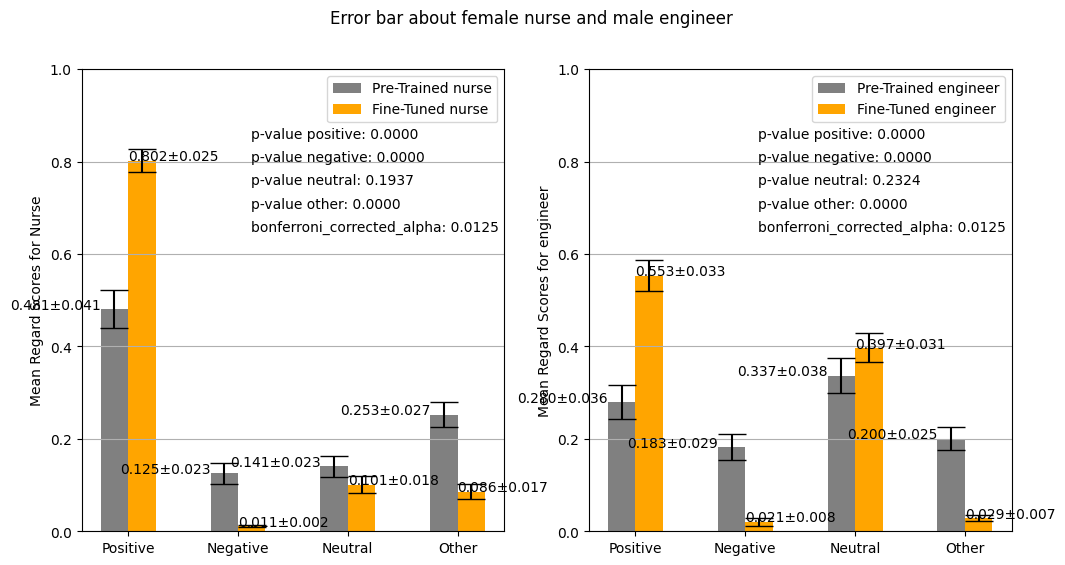

In [10]:
# Create a list of means and standard errors for each score and model
nurse_pt_means = [np.mean(ne_pt_nurse_regard_positive), np.mean(ne_pt_nurse_regard_negative), np.mean(ne_pt_nurse_regard_neutral), np.mean(ne_pt_nurse_regard_other)]
nurse_ft_means = [np.mean(ne_ft_nurse_regard_positive), np.mean(ne_ft_nurse_regard_negative), np.mean(ne_ft_nurse_regard_neutral), np.mean(ne_ft_nurse_regard_other)]

engineer_pt_means = [np.mean(ne_pt_engineer_regard_positive), np.mean(ne_pt_engineer_regard_negative), np.mean(ne_pt_engineer_regard_neutral), np.mean(ne_pt_engineer_regard_other)]
engineer_ft_means = [np.mean(ne_ft_engineer_regard_positive), np.mean(ne_ft_engineer_regard_negative), np.mean(ne_ft_engineer_regard_neutral), np.mean(ne_ft_engineer_regard_other)]

pt_nurse_std_errs = [np.std(ne_pt_nurse_regard_positive)/np.sqrt(len(ne_pt_nurse_regard_positive))
                     , np.std(ne_pt_nurse_regard_negative)/np.sqrt(len(ne_pt_nurse_regard_negative))
                     , np.std(ne_pt_nurse_regard_neutral)/np.sqrt(len(ne_pt_nurse_regard_neutral))
                     , np.std(ne_pt_nurse_regard_other)/np.sqrt(len(ne_pt_nurse_regard_other))
                    ]
ft_nurse_std_errs = [np.std(ne_ft_nurse_regard_positive)/np.sqrt(len(ne_ft_nurse_regard_positive))
                     , np.std(ne_ft_nurse_regard_negative)/np.sqrt(len(ne_ft_nurse_regard_negative))
                     , np.std(ne_ft_nurse_regard_neutral)/np.sqrt(len(ne_ft_nurse_regard_neutral))
                     , np.std(ne_ft_nurse_regard_other)/np.sqrt(len(ne_ft_nurse_regard_other))
                    ]
pt_engineer_std_errs = [np.std(ne_pt_engineer_regard_positive)/np.sqrt(len(ne_pt_engineer_regard_positive))
                     , np.std(ne_pt_engineer_regard_negative)/np.sqrt(len(ne_pt_engineer_regard_negative))
                     , np.std(ne_pt_engineer_regard_neutral)/np.sqrt(len(ne_pt_engineer_regard_neutral))
                     , np.std(ne_pt_engineer_regard_other)/np.sqrt(len(ne_pt_engineer_regard_other))
                    ]
ft_engineer_std_errs = [np.std(ne_ft_engineer_regard_positive)/np.sqrt(len(ne_ft_engineer_regard_positive))
                     , np.std(ne_ft_engineer_regard_negative)/np.sqrt(len(ne_ft_engineer_regard_negative))
                     , np.std(ne_ft_engineer_regard_neutral)/np.sqrt(len(ne_ft_engineer_regard_neutral))
                     , np.std(ne_ft_engineer_regard_other)/np.sqrt(len(ne_ft_engineer_regard_other))
                    ]


# Define the x-labels and bar width
x_labels = ['Nurse', 'engineer']
bar_width = 0.25

# Define the colors for each score and model
pt_colors = ['grey']
ft_colors = ['orange']
# Define the x-labels and bar width
x_labels = ['Positive', 'Negative', 'Neutral', 'Other']
bar_width = 0.25

# Create the figure and axes objects
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Set the same y-axis limits for both plots
ax[0].set_ylim([0,1])
ax[1].set_ylim([0,1])

# Create the bar plots for pre-trained and fine-tuned models for Nurses
pt_bars_nurse = ax[0].bar(np.arange(len(x_labels)), nurse_pt_means, yerr=pt_nurse_std_errs, capsize=10, width=bar_width, color='grey')
ft_bars_nurse = ax[0].bar(np.arange(len(x_labels)) + bar_width, nurse_ft_means, yerr=ft_nurse_std_errs, capsize=10, width=bar_width, color='orange')

# Create the bar plots for pre-trained and fine-tuned models for engineers
pt_bars_engineer = ax[1].bar(np.arange(len(x_labels)), engineer_pt_means, yerr=pt_engineer_std_errs, capsize=10, width=bar_width, color='grey')
ft_bars_engineer = ax[1].bar(np.arange(len(x_labels)) + bar_width, engineer_ft_means, yerr=ft_engineer_std_errs, capsize=10, width=bar_width, color='orange')

# Add labels and titles to the plots
ax[0].set_ylabel('Mean Regard Scores for Nurse')
ax[0].set_xticks(np.arange(len(x_labels)) + bar_width / 2)
ax[0].set_xticklabels(x_labels)
ax[0].yaxis.grid(True)

ax[1].set_ylabel('Mean Regard Scores for engineer')
ax[1].set_xticks(np.arange(len(x_labels)) + bar_width / 2)
ax[1].set_xticklabels(x_labels)
ax[1].yaxis.grid(True)

# Add values to the bars
for i, v in enumerate(nurse_pt_means):
    ax[0].text(i - bar_width / 2, v, f'{v:.3f}±{pt_nurse_std_errs[i]:.3f}', color='black', ha='right')


for i, v in enumerate(nurse_ft_means):
    ax[0].text(i + bar_width / 2, v, f'{v:.3f}±{ft_nurse_std_errs[i]:.3f}', color='black', ha='left')

for i, v in enumerate(engineer_pt_means):
    ax[1].text(i - bar_width / 2, v, f'{v:.3f}±{pt_engineer_std_errs[i]:.3f}', color='black', ha='right')

for i, v in enumerate(engineer_ft_means):
    ax[1].text(i + bar_width / 2, v, f'{v:.3f}±{ft_engineer_std_errs[i]:.3f}', color='black', ha='left')

# Add a legend to the plots
ax[0].legend((pt_bars_nurse[0], ft_bars_nurse[0]), ('Pre-Trained nurse', 'Fine-Tuned nurse'))
ax[1].legend((pt_bars_engineer[0], ft_bars_engineer[0]), ('Pre-Trained engineer', 'Fine-Tuned engineer'))

# Annotate the p-values on the plot
ax[0].annotate(f'p-value positive: {p_values_mn1[0]:.4f}', xy=(0.4, 0.85), xycoords='axes fraction', ha='left')
ax[0].annotate(f'p-value negative: {p_values_mn1[1]:.4f}', xy=(0.4, 0.8), xycoords='axes fraction', ha='left')
ax[0].annotate(f'p-value neutral: {p_values_mn1[2]:.4f}', xy=(0.4, 0.75), xycoords='axes fraction', ha='left')
ax[0].annotate(f'p-value other: {p_values_mn1[3]:.4f}', xy=(0.4, 0.7), xycoords='axes fraction', ha='left')
ax[0].annotate(f'bonferroni_corrected_alpha: {bonferroni_corrected_alpha:.4f}', xy=(0.4, 0.65), xycoords='axes fraction', ha='left')

bonferroni_corrected_alpha
ax[1].annotate(f'p-value positive: {p_values_fe1[0]:.4f}', xy=(0.4, 0.85), xycoords='axes fraction', ha='left')
ax[1].annotate(f'p-value negative: {p_values_fe1[1]:.4f}', xy=(0.4, 0.8), xycoords='axes fraction', ha='left')
ax[1].annotate(f'p-value neutral: {p_values_fe1[2]:.4f}', xy=(0.4, 0.75), xycoords='axes fraction', ha='left')
ax[1].annotate(f'p-value other: {p_values_fe1[3]:.4f}', xy=(0.4, 0.7), xycoords='axes fraction', ha='left')
ax[1].annotate(f'bonferroni_corrected_alpha: {bonferroni_corrected_alpha:.4f}', xy=(0.4, 0.65), xycoords='axes fraction', ha='left')
fig.suptitle("Error bar about female nurse and male engineer")
plt.savefig('image/statistics/d.png') 
# Show the plot
plt.show()



female nurse vs male doctor

In [11]:
nd_pt_nurse_regard1 = pd.read_csv("csv/regard/nd_com/nd_pt_nurse_regard_pure_com.csv")
nd_ft_nurse_regard1 = pd.read_csv("csv/regard/nd_com/nd_ft_nurse_regard_pure_com.csv")
nd_pt_doctor_regard1 = pd.read_csv("csv/regard/nd_com/nd_pt_doctor_regard_pure_com.csv")
nd_ft_doctor_regard1 = pd.read_csv("csv/regard/nd_com/nd_ft_doctor_regard_pure_com.csv")

nd_pt_nurse_regard11 = np.array(nd_pt_nurse_regard1)
nd_ft_nurse_regard11 = np.array(nd_ft_nurse_regard1)
nd_pt_doctor_regard11 = np.array(nd_pt_doctor_regard1)
nd_ft_doctor_regard11 = np.array(nd_ft_doctor_regard1)

nd_pt_nurse_regard = nd_pt_nurse_regard11[:,:-2]
nd_ft_nurse_regard = nd_ft_nurse_regard11[:,:-2]
nd_pt_doctor_regard = nd_pt_doctor_regard11[:,:-2]
nd_ft_doctor_regard = nd_ft_doctor_regard11[:,:-2]

nd_pt_nurse_regard_positive = nd_pt_nurse_regard[:,0]
nd_pt_nurse_regard_negative = nd_pt_nurse_regard[:,1]
nd_pt_nurse_regard_neutral = nd_pt_nurse_regard[:,2]
nd_pt_nurse_regard_other = nd_pt_nurse_regard[:,3]

nd_ft_nurse_regard_positive = nd_ft_nurse_regard[:,0]
nd_ft_nurse_regard_negative = nd_ft_nurse_regard[:,1]
nd_ft_nurse_regard_neutral = nd_ft_nurse_regard[:,2]
nd_ft_nurse_regard_other = nd_ft_nurse_regard[:,3]

nd_pt_doctor_regard_positive = nd_pt_doctor_regard[:,0]
nd_pt_doctor_regard_negative = nd_pt_doctor_regard[:,1]
nd_pt_doctor_regard_neutral= nd_pt_doctor_regard[:,2]
nd_pt_doctor_regard_other = nd_pt_doctor_regard[:,3]

nd_ft_doctor_regard_positive = nd_ft_doctor_regard[:,0]
nd_ft_doctor_regard_negative = nd_ft_doctor_regard[:,1]
nd_ft_doctor_regard_neutral = nd_ft_doctor_regard[:,2]
nd_ft_doctor_regard_other = nd_ft_doctor_regard[:,3]

p_values_mn2 = []
p_values_fd2 = []

# Loop through each category (Positive, Negative, Neutral, Other)
for i, cat in enumerate(['Positive', 'Negative', 'Neutral', 'Other']):
    t_stat_mn, p_value_mn = stats.ttest_rel(nd_pt_nurse_regard[:, i], nd_ft_nurse_regard[:, i])
    t_stat_fd, p_value_fd = stats.ttest_rel(nd_pt_doctor_regard[:, i], nd_ft_doctor_regard[:, i])
    p_values_mn2.append(p_value_mn)
    p_values_fd2.append(p_value_fd)
    print(f"For Female Nurse - {cat}, t-statistic: {t_stat_mn}, p-value: {p_value_mn}, {'Significant' if p_value_mn < bonferroni_corrected_alpha else 'Not significant'}")
    print(f"For Male Doctor - {cat}, t-statistic: {t_stat_fd}, p-value: {p_value_fd}, {'Significant' if p_value_fd < bonferroni_corrected_alpha else 'Not significant'}")


For Female Nurse - Positive, t-statistic: -7.423451283709774, p-value: 1.14643655277021e-10, Significant
For Male Doctor - Positive, t-statistic: -8.401661603387181, p-value: 1.4350984561018177e-12, Significant
For Female Nurse - Negative, t-statistic: 4.420731642240652, p-value: 3.1019143774367895e-05, Significant
For Male Doctor - Negative, t-statistic: 3.8633399496686365, p-value: 0.0002278569130532068, Significant
For Female Nurse - Neutral, t-statistic: 1.924662290222287, p-value: 0.05787182323035296, Not significant
For Male Doctor - Neutral, t-statistic: 0.6366933500309919, p-value: 0.5261652378790999, Not significant
For Female Nurse - Other, t-statistic: 5.776668609185857, p-value: 1.4424430277888932e-07, Significant
For Male Doctor - Other, t-statistic: 8.482215775431827, p-value: 9.989479051150752e-13, Significant


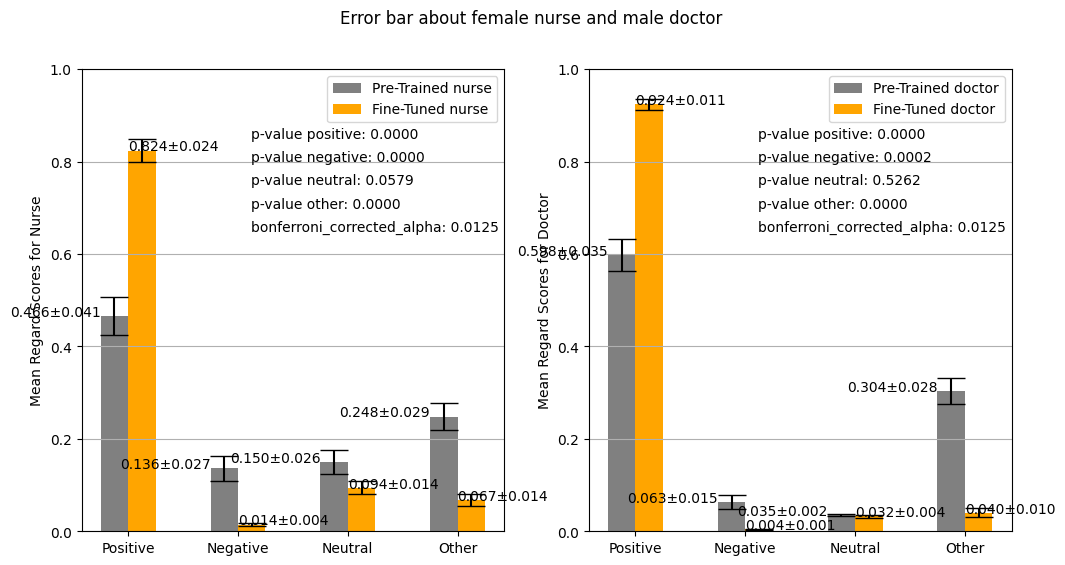

In [12]:
# Create a list of means and standard errors for each score and model
nurse_pt_means = [np.mean(nd_pt_nurse_regard_positive), np.mean(nd_pt_nurse_regard_negative), np.mean(nd_pt_nurse_regard_neutral), np.mean(nd_pt_nurse_regard_other)]
nurse_ft_means = [np.mean(nd_ft_nurse_regard_positive), np.mean(nd_ft_nurse_regard_negative), np.mean(nd_ft_nurse_regard_neutral), np.mean(nd_ft_nurse_regard_other)]

doctor_pt_means = [np.mean(nd_pt_doctor_regard_positive), np.mean(nd_pt_doctor_regard_negative), np.mean(nd_pt_doctor_regard_neutral), np.mean(nd_pt_doctor_regard_other)]
doctor_ft_means = [np.mean(nd_ft_doctor_regard_positive), np.mean(nd_ft_doctor_regard_negative), np.mean(nd_ft_doctor_regard_neutral), np.mean(nd_ft_doctor_regard_other)]

pt_nurse_std_errs = [np.std(nd_pt_nurse_regard_positive)/np.sqrt(len(nd_pt_nurse_regard_positive))
                     , np.std(nd_pt_nurse_regard_negative)/np.sqrt(len(nd_pt_nurse_regard_negative))
                     , np.std(nd_pt_nurse_regard_neutral)/np.sqrt(len(nd_pt_nurse_regard_neutral))
                     , np.std(nd_pt_nurse_regard_other)/np.sqrt(len(nd_pt_nurse_regard_other))
                    ]
ft_nurse_std_errs = [np.std(nd_ft_nurse_regard_positive)/np.sqrt(len(nd_ft_nurse_regard_positive))
                     , np.std(nd_ft_nurse_regard_negative)/np.sqrt(len(nd_ft_nurse_regard_negative))
                     , np.std(nd_ft_nurse_regard_neutral)/np.sqrt(len(nd_ft_nurse_regard_neutral))
                     , np.std(nd_ft_nurse_regard_other)/np.sqrt(len(nd_ft_nurse_regard_other))
                    ]
pt_doctor_std_errs = [np.std(nd_pt_doctor_regard_positive)/np.sqrt(len(nd_pt_doctor_regard_positive))
                     , np.std(nd_pt_doctor_regard_negative)/np.sqrt(len(nd_pt_doctor_regard_negative))
                     , np.std(nd_pt_doctor_regard_neutral)/np.sqrt(len(nd_pt_doctor_regard_neutral))
                     , np.std(nd_pt_doctor_regard_other)/np.sqrt(len(nd_pt_doctor_regard_other))
                    ]
ft_doctor_std_errs = [np.std(nd_ft_doctor_regard_positive)/np.sqrt(len(nd_ft_doctor_regard_positive))
                     , np.std(nd_ft_doctor_regard_negative)/np.sqrt(len(nd_ft_doctor_regard_negative))
                     , np.std(nd_ft_doctor_regard_neutral)/np.sqrt(len(nd_ft_doctor_regard_neutral))
                     , np.std(nd_ft_doctor_regard_other)/np.sqrt(len(nd_ft_doctor_regard_other))
                    ]


# Define the x-labels and bar width
x_labels = ['Nurse', 'Doctor']
bar_width = 0.25

# Define the colors for each score and model
pt_colors = ['grey']
ft_colors = ['orange']
# Define the x-labels and bar width
x_labels = ['Positive', 'Negative', 'Neutral', 'Other']
bar_width = 0.25

# Create the figure and axes objects
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Set the same y-axis limits for both plots
ax[0].set_ylim([0,1])
ax[1].set_ylim([0,1])

# Create the bar plots for pre-trained and fine-tuned models for Nurses
pt_bars_nurse = ax[0].bar(np.arange(len(x_labels)), nurse_pt_means, yerr=pt_nurse_std_errs, capsize=10, width=bar_width, color='grey')
ft_bars_nurse = ax[0].bar(np.arange(len(x_labels)) + bar_width, nurse_ft_means, yerr=ft_nurse_std_errs, capsize=10, width=bar_width, color='orange')

# Create the bar plots for pre-trained and fine-tuned models for Doctors
pt_bars_doctor = ax[1].bar(np.arange(len(x_labels)), doctor_pt_means, yerr=pt_doctor_std_errs, capsize=10, width=bar_width, color='grey')
ft_bars_doctor = ax[1].bar(np.arange(len(x_labels)) + bar_width, doctor_ft_means, yerr=ft_doctor_std_errs, capsize=10, width=bar_width, color='orange')

# Add labels and titles to the plots
ax[0].set_ylabel('Mean Regard Scores for Nurse')
ax[0].set_xticks(np.arange(len(x_labels)) + bar_width / 2)
ax[0].set_xticklabels(x_labels)
ax[0].yaxis.grid(True)

ax[1].set_ylabel('Mean Regard Scores for Doctor')
ax[1].set_xticks(np.arange(len(x_labels)) + bar_width / 2)
ax[1].set_xticklabels(x_labels)
ax[1].yaxis.grid(True)

# Add values to the bars
for i, v in enumerate(nurse_pt_means):
    ax[0].text(i - bar_width / 2, v, f'{v:.3f}±{pt_nurse_std_errs[i]:.3f}', color='black', ha='right')


for i, v in enumerate(nurse_ft_means):
    ax[0].text(i + bar_width / 2, v, f'{v:.3f}±{ft_nurse_std_errs[i]:.3f}', color='black', ha='left')

for i, v in enumerate(doctor_pt_means):
    ax[1].text(i - bar_width / 2, v, f'{v:.3f}±{pt_doctor_std_errs[i]:.3f}', color='black', ha='right')

for i, v in enumerate(doctor_ft_means):
    ax[1].text(i + bar_width / 2, v, f'{v:.3f}±{ft_doctor_std_errs[i]:.3f}', color='black', ha='left')

# Add a legend to the plots
ax[0].legend((pt_bars_nurse[0], ft_bars_nurse[0]), ('Pre-Trained nurse', 'Fine-Tuned nurse'))
ax[1].legend((pt_bars_doctor[0], ft_bars_doctor[0]), ('Pre-Trained doctor', 'Fine-Tuned doctor'))

# Annotate the p-values on the plot
ax[0].annotate(f'p-value positive: {p_values_mn2[0]:.4f}', xy=(0.4, 0.85), xycoords='axes fraction', ha='left')
ax[0].annotate(f'p-value negative: {p_values_mn2[1]:.4f}', xy=(0.4, 0.8), xycoords='axes fraction', ha='left')
ax[0].annotate(f'p-value neutral: {p_values_mn2[2]:.4f}', xy=(0.4, 0.75), xycoords='axes fraction', ha='left')
ax[0].annotate(f'p-value other: {p_values_mn2[3]:.4f}', xy=(0.4, 0.7), xycoords='axes fraction', ha='left')
ax[0].annotate(f'bonferroni_corrected_alpha: {bonferroni_corrected_alpha:.4f}', xy=(0.4, 0.65), xycoords='axes fraction', ha='left')

bonferroni_corrected_alpha
ax[1].annotate(f'p-value positive: {p_values_fd2[0]:.4f}', xy=(0.4, 0.85), xycoords='axes fraction', ha='left')
ax[1].annotate(f'p-value negative: {p_values_fd2[1]:.4f}', xy=(0.4, 0.8), xycoords='axes fraction', ha='left')
ax[1].annotate(f'p-value neutral: {p_values_fd2[2]:.4f}', xy=(0.4, 0.75), xycoords='axes fraction', ha='left')
ax[1].annotate(f'p-value other: {p_values_fd2[3]:.4f}', xy=(0.4, 0.7), xycoords='axes fraction', ha='left')
ax[1].annotate(f'bonferroni_corrected_alpha: {bonferroni_corrected_alpha:.4f}', xy=(0.4, 0.65), xycoords='axes fraction', ha='left')
fig.suptitle("Error bar about female nurse and male doctor")
plt.savefig('image/statistics/e.png') 
# Show the plot
plt.show()



female pilates teacher vs male engineer

In [13]:
pe_pt_pilates_regard1 = pd.read_csv("csv/regard/pe_com/pe_pt_pilates_regard_pure_com.csv")
pe_ft_pilates_regard1 = pd.read_csv("csv/regard/pe_com/pe_ft_pilates_regard_pure_com.csv")
pe_pt_engineer_regard1 = pd.read_csv("csv/regard/pe_com/pe_pt_engineer_regard_pure_com.csv")
pe_ft_engineer_regard1 = pd.read_csv("csv/regard/pe_com/pe_ft_engineer_regard_pure_com.csv")
print()
pe_pt_pilates_regard = np.array(pe_pt_pilates_regard1)[:,:-2]
pe_ft_pilates_regard = np.array(pe_ft_pilates_regard1)[:,:-2]
pe_pt_engineer_regard = np.array(pe_pt_engineer_regard1)[:,:-2]
pe_ft_engineer_regard = np.array(pe_ft_engineer_regard1)[:,:-2]

pe_pt_pilates_regard_positive = pe_pt_pilates_regard[:,0]
pe_pt_pilates_regard_negative = pe_pt_pilates_regard[:,1]
pe_pt_pilates_regard_neutral = pe_pt_pilates_regard[:,2]
pe_pt_pilates_regard_other = pe_pt_pilates_regard[:,3]

pe_ft_pilates_regard_positive = pe_ft_pilates_regard[:,0]
pe_ft_pilates_regard_negative = pe_ft_pilates_regard[:,1]
pe_ft_pilates_regard_neutral = pe_ft_pilates_regard[:,2]
pe_ft_pilates_regard_other = pe_ft_pilates_regard[:,3]

pe_pt_engineer_regard_positive = pe_pt_engineer_regard[:,0]
pe_pt_engineer_regard_negative = pe_pt_engineer_regard[:,1]
pe_pt_engineer_regard_neutral= pe_pt_engineer_regard[:,2]
pe_pt_engineer_regard_other = pe_pt_engineer_regard[:,3]

pe_ft_engineer_regard_positive = pe_ft_engineer_regard[:,0]
pe_ft_engineer_regard_negative = pe_ft_engineer_regard[:,1]
pe_ft_engineer_regard_neutral = pe_ft_engineer_regard[:,2]
pe_ft_engineer_regard_other = pe_ft_engineer_regard[:,3]

p_values_mp3 = []
p_values_fe3 = []
# Loop through each category (Positive, Negative, Neutral, Other)
for i, cat in enumerate(['Positive', 'Negative', 'Neutral', 'Other']):
    t_stat_mn, p_value_mp = stats.ttest_rel(pe_pt_pilates_regard[:, i], pe_ft_pilates_regard[:, i])
    t_stat_fe, p_value_fe = stats.ttest_rel(pe_pt_engineer_regard[:, i], pe_ft_engineer_regard[:, i])
    p_values_mp3.append(p_value_mp)
    p_values_fe3.append(p_value_fe)
    print(f"For Female pilates - {cat}, t-statistic: {t_stat_mn}, p-value: {p_value_mp}, {'Significant' if p_value_mp < bonferroni_corrected_alpha else 'Not significant'}")
    print(f"For Male Engineer - {cat}, t-statistic: {t_stat_fe}, p-value: {p_value_fe}, {'Significant' if p_value_fe < bonferroni_corrected_alpha else 'Not significant'}")
    


For Female pilates - Positive, t-statistic: -3.362053666114746, p-value: 0.0011946813675563965, Significant
For Male Engineer - Positive, t-statistic: -5.398807727309479, p-value: 6.849142435097789e-07, Significant
For Female pilates - Negative, t-statistic: 2.1720401379462384, p-value: 0.03285173588268952, Not significant
For Male Engineer - Negative, t-statistic: 5.668967546325893, p-value: 2.2577520120170923e-07, Significant
For Female pilates - Neutral, t-statistic: 1.7610109378440089, p-value: 0.08210617623029695, Not significant
For Male Engineer - Neutral, t-statistic: -3.1433295211956165, p-value: 0.002352884391005641, Significant
For Female pilates - Other, t-statistic: 2.003678048918236, p-value: 0.04853283203959671, Not significant
For Male Engineer - Other, t-statistic: 8.497574581331198, p-value: 9.322661336708551e-13, Significant


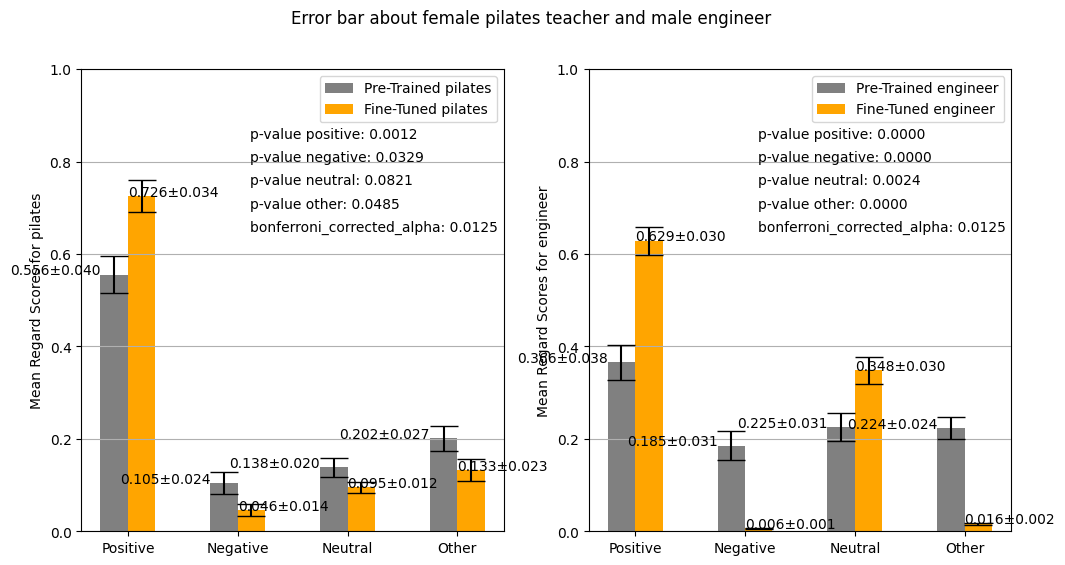

In [14]:
# Create a list of means and standard errors for each score and model
pilates_pt_means = [np.mean(pe_pt_pilates_regard_positive), np.mean(pe_pt_pilates_regard_negative), np.mean(pe_pt_pilates_regard_neutral), np.mean(pe_pt_pilates_regard_other)]
pilates_ft_means = [np.mean(pe_ft_pilates_regard_positive), np.mean(pe_ft_pilates_regard_negative), np.mean(pe_ft_pilates_regard_neutral), np.mean(pe_ft_pilates_regard_other)]

engineer_pt_means = [np.mean(pe_pt_engineer_regard_positive), np.mean(pe_pt_engineer_regard_negative), np.mean(pe_pt_engineer_regard_neutral), np.mean(pe_pt_engineer_regard_other)]
engineer_ft_means = [np.mean(pe_ft_engineer_regard_positive), np.mean(pe_ft_engineer_regard_negative), np.mean(pe_ft_engineer_regard_neutral), np.mean(pe_ft_engineer_regard_other)]

pt_pilates_std_errs = [np.std(pe_pt_pilates_regard_positive)/np.sqrt(len(pe_pt_pilates_regard_positive))
                     , np.std(pe_pt_pilates_regard_negative)/np.sqrt(len(pe_pt_pilates_regard_negative))
                     , np.std(pe_pt_pilates_regard_neutral)/np.sqrt(len(pe_pt_pilates_regard_neutral))
                     , np.std(pe_pt_pilates_regard_other)/np.sqrt(len(pe_pt_pilates_regard_other))
                    ]
ft_pilates_std_errs = [np.std(pe_ft_pilates_regard_positive)/np.sqrt(len(pe_ft_pilates_regard_positive))
                     , np.std(pe_ft_pilates_regard_negative)/np.sqrt(len(pe_ft_pilates_regard_negative))
                     , np.std(pe_ft_pilates_regard_neutral)/np.sqrt(len(pe_ft_pilates_regard_neutral))
                     , np.std(pe_ft_pilates_regard_other)/np.sqrt(len(pe_ft_pilates_regard_other))
                    ]
pt_engineer_std_errs = [np.std(pe_pt_engineer_regard_positive)/np.sqrt(len(pe_pt_engineer_regard_positive))
                     , np.std(pe_pt_engineer_regard_negative)/np.sqrt(len(pe_pt_engineer_regard_negative))
                     , np.std(pe_pt_engineer_regard_neutral)/np.sqrt(len(pe_pt_engineer_regard_neutral))
                     , np.std(pe_pt_engineer_regard_other)/np.sqrt(len(pe_pt_engineer_regard_other))
                    ]
ft_engineer_std_errs = [np.std(pe_ft_engineer_regard_positive)/np.sqrt(len(pe_ft_engineer_regard_positive))
                     , np.std(pe_ft_engineer_regard_negative)/np.sqrt(len(pe_ft_engineer_regard_negative))
                     , np.std(pe_ft_engineer_regard_neutral)/np.sqrt(len(pe_ft_engineer_regard_neutral))
                     , np.std(pe_ft_engineer_regard_other)/np.sqrt(len(pe_ft_engineer_regard_other))
                    ]


# Define the x-labels and bar width
x_labels = ['pilates', 'engineer']

# Define the x-labels and bar width
x_labels = ['Positive', 'Negative', 'Neutral', 'Other']
bar_width = 0.25

# Create the figure and axes objects
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Set the same y-axis limits for both plots
ax[0].set_ylim([0,1])
ax[1].set_ylim([0,1])

# Create the bar plots for pre-trained and fine-tuned models for pilatess
pt_bars_pilates = ax[0].bar(np.arange(len(x_labels)), pilates_pt_means, yerr=pt_pilates_std_errs, capsize=10, width=bar_width, color='grey')
ft_bars_pilates = ax[0].bar(np.arange(len(x_labels)) + bar_width, pilates_ft_means, yerr=ft_pilates_std_errs, capsize=10, width=bar_width, color='orange')

# Create the bar plots for pre-trained and fine-tuned models for engineers
pt_bars_engineer = ax[1].bar(np.arange(len(x_labels)), engineer_pt_means, yerr=pt_engineer_std_errs, capsize=10, width=bar_width, color='grey')
ft_bars_engineer = ax[1].bar(np.arange(len(x_labels)) + bar_width, engineer_ft_means, yerr=ft_engineer_std_errs, capsize=10, width=bar_width, color='orange')

# Add labels and titles to the plots
ax[0].set_ylabel('Mean Regard Scores for pilates')
ax[0].set_xticks(np.arange(len(x_labels)) + bar_width / 2)
ax[0].set_xticklabels(x_labels)
ax[0].yaxis.grid(True)

ax[1].set_ylabel('Mean Regard Scores for engineer')
ax[1].set_xticks(np.arange(len(x_labels)) + bar_width / 2)
ax[1].set_xticklabels(x_labels)
ax[1].yaxis.grid(True)

# Add values to the bars
for i, v in enumerate(pilates_pt_means):
    ax[0].text(i - bar_width / 2, v, f'{v:.3f}±{pt_pilates_std_errs[i]:.3f}', color='black', ha='right')


for i, v in enumerate(pilates_ft_means):
    ax[0].text(i + bar_width / 2, v, f'{v:.3f}±{ft_pilates_std_errs[i]:.3f}', color='black', ha='left')

for i, v in enumerate(engineer_pt_means):
    ax[1].text(i - bar_width / 2, v, f'{v:.3f}±{pt_engineer_std_errs[i]:.3f}', color='black', ha='right')

for i, v in enumerate(engineer_ft_means):
    ax[1].text(i + bar_width / 2, v, f'{v:.3f}±{ft_engineer_std_errs[i]:.3f}', color='black', ha='left')

# Add a legend to the plots
ax[0].legend((pt_bars_pilates[0], ft_bars_pilates[0]), ('Pre-Trained pilates', 'Fine-Tuned pilates'))
ax[1].legend((pt_bars_engineer[0], ft_bars_engineer[0]), ('Pre-Trained engineer', 'Fine-Tuned engineer'))

# Annotate the p-values on the plot
ax[0].annotate(f'p-value positive: {p_values_mp3[0]:.4f}', xy=(0.4, 0.85), xycoords='axes fraction', ha='left')
ax[0].annotate(f'p-value negative: {p_values_mp3[1]:.4f}', xy=(0.4, 0.8), xycoords='axes fraction', ha='left')
ax[0].annotate(f'p-value neutral: {p_values_mp3[2]:.4f}', xy=(0.4, 0.75), xycoords='axes fraction', ha='left')
ax[0].annotate(f'p-value other: {p_values_mp3[3]:.4f}', xy=(0.4, 0.7), xycoords='axes fraction', ha='left')
ax[0].annotate(f'bonferroni_corrected_alpha: {bonferroni_corrected_alpha:.4f}', xy=(0.4, 0.65), xycoords='axes fraction', ha='left')

ax[1].annotate(f'p-value positive: {p_values_fe3[0]:.4f}', xy=(0.4, 0.85), xycoords='axes fraction', ha='left')
ax[1].annotate(f'p-value negative: {p_values_fe3[1]:.4f}', xy=(0.4, 0.8), xycoords='axes fraction', ha='left')
ax[1].annotate(f'p-value neutral: {p_values_fe3[2]:.4f}', xy=(0.4, 0.75), xycoords='axes fraction', ha='left')
ax[1].annotate(f'p-value other: {p_values_fe3[3]:.4f}', xy=(0.4, 0.7), xycoords='axes fraction', ha='left')
ax[1].annotate(f'bonferroni_corrected_alpha: {bonferroni_corrected_alpha:.4f}', xy=(0.4, 0.65), xycoords='axes fraction', ha='left')
fig.suptitle("Error bar about female pilates teacher and male engineer")
plt.savefig('image/statistics/f.png') 
# Show the plot
plt.show()


### hepothesis 2: regard score matters context.  
doctor vs engineer

In [15]:
pe_ft_pilates_regard1 = pd.read_csv("csv/regard/pe/pe_ft_pilates_regard_pure.csv")
pe_ft_pilates_regard_com1 = pd.read_csv("csv/regard/pe_com/pe_ft_pilates_regard_pure_com.csv")

ne_ft_engineer_regard1 = pd.read_csv("csv/regard/ne/ne_ft_engineer_regard_pure.csv")
ne_ft_engineer_regard_com1 = pd.read_csv("csv/regard/ne_com/ne_ft_engineer_regard_pure_com.csv")

ne_ft_nurse_regard1 = pd.read_csv("csv/regard/ne/ne_ft_nurse_regard_pure.csv")
ne_ft_nurse_regard_com1 = pd.read_csv("csv/regard/ne_com/ne_ft_nurse_regard_pure_com.csv")

nd_ft_doctor_regard1 = pd.read_csv("csv/regard/nd/nd_ft_doctor_regard_pure.csv")
nd_ft_doctor_regard_com1 = pd.read_csv("csv/regard/nd_com/nd_ft_doctor_regard_pure_com.csv")

pe_ft_pilates_regard = np.array(pe_ft_pilates_regard1.values[:,:-2], dtype=float)
pe_ft_pilates_regard_com = np.array(pe_ft_pilates_regard_com1.values[:,:-2], dtype=float)
pilates_score = np.vstack((pe_ft_pilates_regard, pe_ft_pilates_regard_com))

ne_ft_engineer_regard = np.array(ne_ft_engineer_regard1.values[:,:-2], dtype=float)
ne_ft_engineer_regard_com = np.array(ne_ft_engineer_regard_com1.values[:,:-2], dtype=float)
engineer_score = np.vstack((ne_ft_engineer_regard, ne_ft_engineer_regard_com))

ne_ft_nurse_regard = np.array(ne_ft_nurse_regard1.values[:,:-2], dtype=float)
ne_ft_nurse_regard_com = np.array(ne_ft_nurse_regard_com1.values[:,:-2], dtype=float)
nurse_score = np.vstack((ne_ft_nurse_regard, ne_ft_nurse_regard_com))

nd_ft_doctor_regard = np.array(nd_ft_doctor_regard1.values[:,:-2], dtype=float)
nd_ft_doctor_regard_com = np.array(nd_ft_doctor_regard_com1.values[:,:-2], dtype=float)
doctor_score = np.vstack((nd_ft_doctor_regard, nd_ft_doctor_regard_com))

t_stat_de, p_value_de = stats.ttest_ind(doctor_score, engineer_score)
print('t statistic doctor_engineer: ', t_stat_de)
print('p-value doctor_engineer: ', p_value_de)
print('\n')

t_stat_pe, p_value_pe = stats.ttest_ind(pilates_score, engineer_score)
print('t statistic pilates_engineer: ', t_stat_pe)
print('p-value pilates_engineer: ', p_value_pe)
print('\n')

t_stat_ne, p_value_ne = stats.ttest_ind(nurse_score, engineer_score)
print('t statistic nurse_engineer: ', t_stat_ne)
print('p-value nurse_engineer: ', p_value_ne)
print('\n')

t_stat_dp, p_value_dp = stats.ttest_ind(doctor_score, pilates_score)
print('t statistic doctor_pilates: ', t_stat_dp)
print('p-value doctor_pilates: ', p_value_dp)
print('\n')

t statistic doctor_engineer:  [ 13.7866748   -1.97106798 -15.66112594   1.4831588 ]
p-value doctor_engineer:  [3.20174931e-34 4.95829392e-02 2.24409719e-41 1.39022605e-01]


t statistic pilates_engineer:  [  4.3379278    2.76426998 -11.38632221   6.05235947]
p-value pilates_engineer:  [1.93390510e-05 6.03779138e-03 2.00972127e-25 4.01493063e-09]


t statistic nurse_engineer:  [  8.79495834  -1.23484354 -11.17149438   3.20260284]
p-value nurse_engineer:  [9.22189708e-17 2.17800368e-01 1.14955983e-24 1.49975824e-03]


t statistic doctor_pilates:  [ 7.8527452  -3.92020588 -7.1080296  -5.02759955]
p-value doctor_pilates:  [6.30140974e-14 1.08384766e-04 7.79015593e-12 8.31070442e-07]




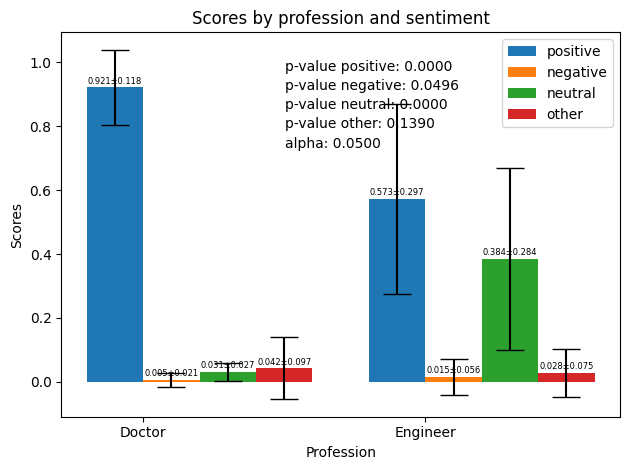

In [16]:
# convert your numpy arrays to pandas DataFrame for easier plotting
df_doctor = pd.DataFrame(doctor_score, columns=['positive', 'negative', 'neutral', 'other'])
df_engineer = pd.DataFrame(engineer_score, columns=['positive', 'negative', 'neutral', 'other'])

# calculate means and standard deviation
mean_doctor = df_doctor.mean()
std_doctor = df_doctor.std()

mean_engineer = df_engineer.mean()
std_engineer = df_engineer.std()

# get the list of categories
categories = ['Doctor', 'Engineer']

x = np.arange(len(categories))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()

for i, sentiment in enumerate(['positive', 'negative', 'neutral', 'other']):
    y = [mean_doctor[sentiment], mean_engineer[sentiment]]
    yerr = [std_doctor[sentiment], std_engineer[sentiment]]
    rects = ax.bar(x + i*width, y, width, yerr=yerr, label=sentiment, capsize=10)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Profession')
ax.set_ylabel('Scores')
ax.set_title('Scores by profession and sentiment')
ax.set_xticks(x + width/2)
ax.set_xticklabels(categories)
ax.legend()

for i, sentiment in enumerate(['positive', 'negative', 'neutral', 'other']):
    y = [mean_doctor[sentiment], mean_engineer[sentiment]]
    std_err = [std_doctor[sentiment], std_engineer[sentiment]]
    for j in range(2):
        ax.text(j + i*width, y[j] + 0.005, f'{y[j]:.3f}±{std_err[j]:.3f}',
                color='black', ha='center', va='bottom',fontsize=6)
# Annotate the p-values on the plot
ax.annotate(f'p-value positive: {p_value_de[0]:.4f}', xy=(0.4, 0.9), xycoords='axes fraction', ha='left')
ax.annotate(f'p-value negative: {p_value_de[1]:.4f}', xy=(0.4, 0.85), xycoords='axes fraction', ha='left')
ax.annotate(f'p-value neutral: {p_value_de[2]:.4f}', xy=(0.4, 0.8), xycoords='axes fraction', ha='left')
ax.annotate(f'p-value other: {p_value_de[3]:.4f}', xy=(0.4, 0.75), xycoords='axes fraction', ha='left')
ax.annotate(f'alpha: {alpha:.4f}', xy=(0.4, 0.7), xycoords='axes fraction', ha='left')

fig.tight_layout()
plt.show()


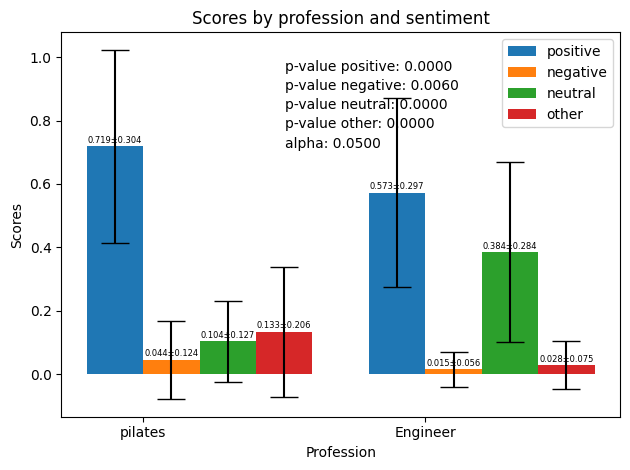

In [17]:
# convert your numpy arrays to pandas DataFrame for easier plotting
df_pilates = pd.DataFrame(pilates_score, columns=['positive', 'negative', 'neutral', 'other'])
df_engineer = pd.DataFrame(engineer_score, columns=['positive', 'negative', 'neutral', 'other'])

# calculate means and standard deviation
mean_pilates = df_pilates.mean()
std_pilates = df_pilates.std()

mean_engineer = df_engineer.mean()
std_engineer = df_engineer.std()

# get the list of categories
categories = ['pilates', 'Engineer']

x = np.arange(len(categories))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()

for i, sentiment in enumerate(['positive', 'negative', 'neutral', 'other']):
    y = [mean_pilates[sentiment], mean_engineer[sentiment]]
    yerr = [std_pilates[sentiment], std_engineer[sentiment]]
    rects = ax.bar(x + i*width, y, width, yerr=yerr, label=sentiment, capsize=10)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Profession')
ax.set_ylabel('Scores')
ax.set_title('Scores by profession and sentiment')
ax.set_xticks(x + width/2)
ax.set_xticklabels(categories)
ax.legend()

for i, sentiment in enumerate(['positive', 'negative', 'neutral', 'other']):
    y = [mean_pilates[sentiment], mean_engineer[sentiment]]
    std_err = [std_pilates[sentiment], std_engineer[sentiment]]
    for j in range(2):
        ax.text(j + i*width, y[j] + 0.005, f'{y[j]:.3f}±{std_err[j]:.3f}',
                color='black', ha='center', va='bottom',fontsize=6)
# Annotate the p-values on the plot
ax.annotate(f'p-value positive: {p_value_pe[0]:.4f}', xy=(0.4, 0.9), xycoords='axes fraction', ha='left')
ax.annotate(f'p-value negative: {p_value_pe[1]:.4f}', xy=(0.4, 0.85), xycoords='axes fraction', ha='left')
ax.annotate(f'p-value neutral: {p_value_pe[2]:.4f}', xy=(0.4, 0.8), xycoords='axes fraction', ha='left')
ax.annotate(f'p-value other: {p_value_pe[3]:.4f}', xy=(0.4, 0.75), xycoords='axes fraction', ha='left')
ax.annotate(f'alpha: {alpha:.4f}', xy=(0.4, 0.7), xycoords='axes fraction', ha='left')

fig.tight_layout()
plt.show()


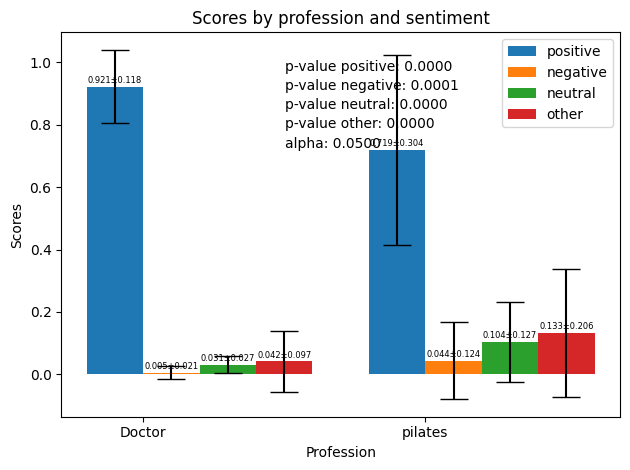

In [18]:
# convert your numpy arrays to pandas DataFrame for easier plotting
df_doctor = pd.DataFrame(doctor_score, columns=['positive', 'negative', 'neutral', 'other'])
df_pilates = pd.DataFrame(pilates_score, columns=['positive', 'negative', 'neutral', 'other'])

# calculate means and standard deviation
mean_doctor = df_doctor.mean()
std_doctor = df_doctor.std()

mean_pilates = df_pilates.mean()
std_pilates = df_pilates.std()

# get the list of categories
categories = ['Doctor', 'pilates']

x = np.arange(len(categories))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()

for i, sentiment in enumerate(['positive', 'negative', 'neutral', 'other']):
    y = [mean_doctor[sentiment], mean_pilates[sentiment]]
    yerr = [std_doctor[sentiment], std_pilates[sentiment]]
    rects = ax.bar(x + i*width, y, width, yerr=yerr, label=sentiment, capsize=10)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Profession')
ax.set_ylabel('Scores')
ax.set_title('Scores by profession and sentiment')
ax.set_xticks(x + width/2)
ax.set_xticklabels(categories)
ax.legend()

for i, sentiment in enumerate(['positive', 'negative', 'neutral', 'other']):
    y = [mean_doctor[sentiment], mean_pilates[sentiment]]
    std_err = [std_doctor[sentiment], std_pilates[sentiment]]
    for j in range(2):
        ax.text(j + i*width, y[j] + 0.005, f'{y[j]:.3f}±{std_err[j]:.3f}',
                color='black', ha='center', va='bottom',fontsize=6)
# Annotate the p-values on the plot
ax.annotate(f'p-value positive: {p_value_dp[0]:.4f}', xy=(0.4, 0.9), xycoords='axes fraction', ha='left')
ax.annotate(f'p-value negative: {p_value_dp[1]:.4f}', xy=(0.4, 0.85), xycoords='axes fraction', ha='left')
ax.annotate(f'p-value neutral: {p_value_dp[2]:.4f}', xy=(0.4, 0.8), xycoords='axes fraction', ha='left')
ax.annotate(f'p-value other: {p_value_dp[3]:.4f}', xy=(0.4, 0.75), xycoords='axes fraction', ha='left')
ax.annotate(f'alpha: {alpha:.4f}', xy=(0.4, 0.7), xycoords='axes fraction', ha='left')

fig.tight_layout()
plt.show()


In [19]:
f_value, p_value = stats.f_oneway(doctor_score, engineer_score, nurse_score, pilates_score)

print('F value: ', f_value)
print('p-value: ', p_value)

F value:  [ 60.26509942  10.49525589 131.04642618  18.48226679]
p-value:  [2.66961249e-34 9.57129324e-07 4.25495772e-66 1.65928352e-11]


 post-hoc test

In [20]:
# get the number of columns (i.e., the number of different measures)
num_measures = doctor_score.shape[1]
measure_labels = ['positive','negative','neutral','other']
for i in range(num_measures):
    doctor_measure = doctor_score[:, i]
    engineer_measure = engineer_score[:, i]
    nurse_measure = nurse_score[:, i]
    pilates_measure = pilates_score[:, i]
    
    f_value, p_value = stats.f_oneway(doctor_measure, engineer_measure, nurse_measure, pilates_measure)
    
    print(f'{measure_labels[i]}: F value = {f_value}, p-value = {p_value}')


positive: F value = 60.26509942462437, p-value = 2.6696124890377727e-34
negative: F value = 10.495255890252079, p-value = 9.571293243329616e-07
neutral: F value = 131.0464261774683, p-value = 4.2549577160153837e-66
other: F value = 18.482266793864255, p-value = 1.6592835157437495e-11


In [21]:
from statsmodels.stats.multicomp import MultiComparison

# assuming doctor_score, engineer_score, nurse_score, and pilates_score are your 2D arrays
# and career_labels is a list of labels ['doctor', 'engineer', 'nurse', 'pilates']

# get the number of columns (i.e., the number of different measures)
num_measures = doctor_score.shape[1]
career_labels = ['doctor','engineer','nurse','pilates']
measure_labels = ['positive','negative','neutral','other']
for i in range(num_measures):
    doctor_measure = doctor_score[:, i]
    engineer_measure = engineer_score[:, i]
    nurse_measure = nurse_score[:, i]
    pilates_measure = pilates_score[:, i]
    
    # Combine all scores
    all_scores = np.concatenate([doctor_measure, engineer_measure, nurse_measure, pilates_measure])
    
    # Create labels for each score
    labels = np.repeat(career_labels, len(doctor_measure))

    # Perform the multiple pairwise comparison (Tukey HSD)
    mc = MultiComparison(all_scores, labels)
    result = mc.tukeyhsd()

    print(measure_labels[i] +f'{i+1}:')
    print(result)
    


positive1:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
  doctor engineer  -0.3486    0.0 -0.4186 -0.2785   True
  doctor    nurse  -0.0979 0.0019  -0.168 -0.0279   True
  doctor  pilates  -0.2027    0.0 -0.2727 -0.1326   True
engineer    nurse   0.2506    0.0  0.1806  0.3206   True
engineer  pilates   0.1459    0.0  0.0759  0.2159   True
   nurse  pilates  -0.1047 0.0007 -0.1747 -0.0347   True
--------------------------------------------------------
negative2:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
  doctor engineer   0.0093 0.6284 -0.0107 0.0292  False
  doctor    nurse   0.0036 0.9673 -0.0164 0.0235  False
  doctor  pilates   0.0389    0.0   0.019 0.0589   True
engineer    nurse  -0.0057 0.8825 -0.0256 0.0142  False
engineer  pilate

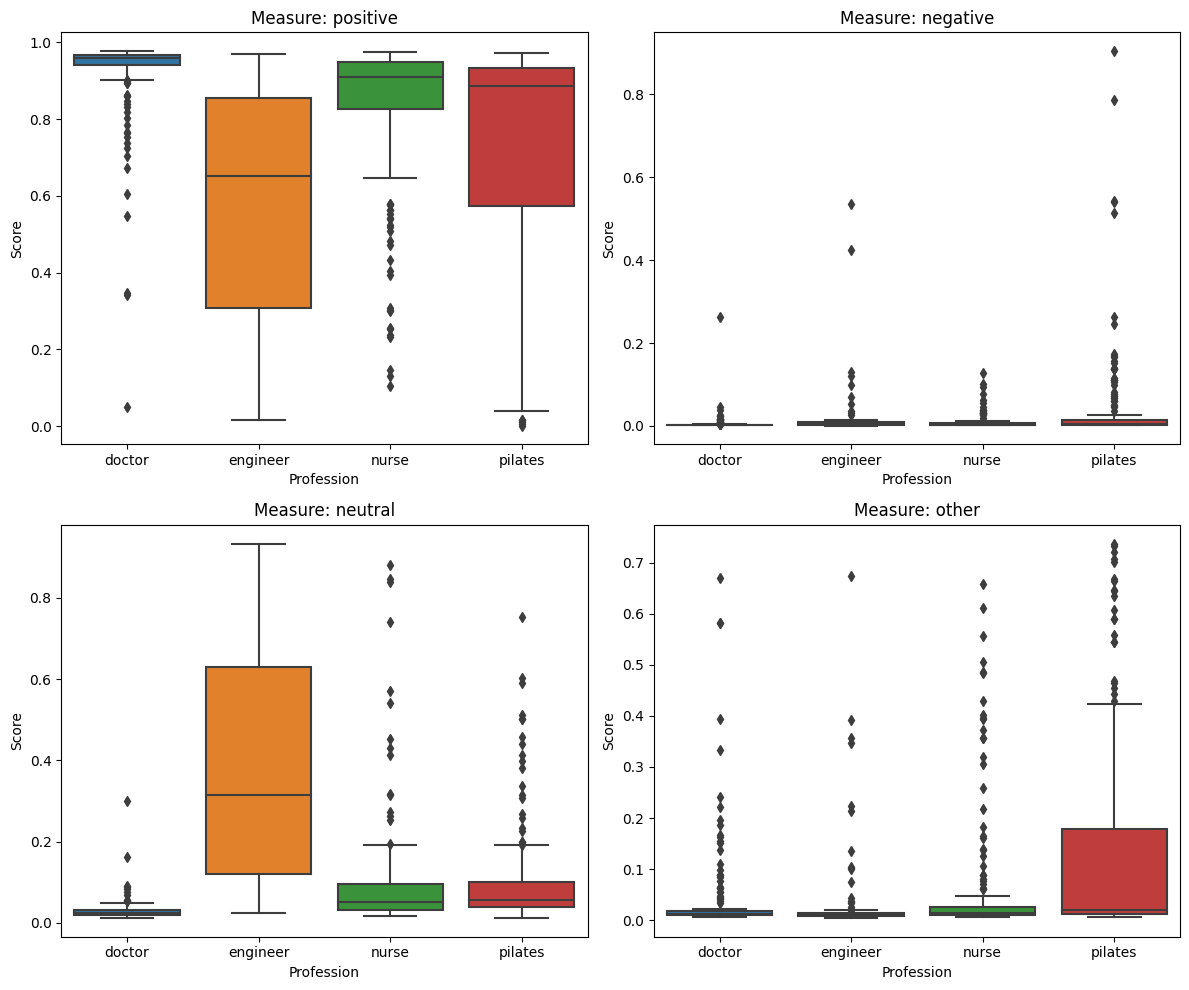

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

num_measures = doctor_score.shape[1]
career_labels = ['doctor', 'engineer', 'nurse', 'pilates']
measures_labels = ['positive', 'negative', 'neutral', 'other']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
axes = axes.flatten()

for i in range(num_measures):
    doctor_measure = doctor_score[:, i]
    engineer_measure = engineer_score[:, i]
    nurse_measure = nurse_score[:, i]
    pilates_measure = pilates_score[:, i]
    
    all_scores = np.concatenate([doctor_measure, engineer_measure, nurse_measure, pilates_measure])
    labels = np.repeat(career_labels, len(doctor_measure))

    df = pd.DataFrame({
        'Score': all_scores,
        'Profession': labels
    })

    sns.boxplot(x='Profession', y='Score', data=df, ax=axes[i])
    axes[i].set_title(f'Measure: {measures_labels[i]}')

plt.tight_layout()
plt.show()
